# 笔试ACM输入格式

In [ ]:
## 多样例多行输入
T = input()
for _ in range(T):
    input()
    a = list(map(int,input().split()))
    s = input()

# python知识以及计算机知识

## python开发

### 锁

python开发的知识【锁，数据并行化】<br>

python中的锁氛围两种：1.互斥锁 2.可重入锁 <br>
---互斥锁：对数据进行锁定，避免其他线程篡改资源，线程完成一定要释放锁，一般用with来加锁，with结束会自动释放锁 <br>
---可重入锁：允许同一线程中进行锁的嵌套<br>


## python中如何处理大数溢出

In [ ]:
from decimal import Decimal

def factorial(n):
    result = Decimal(1)
    for i in range(2, n+1):
        print(result)
        result *= Decimal(i)
    return result

print(factorial(1000))

## self-attention

In [ ]:
import torch
import torch.nn as nn

class Attention(nn.Module):
    def __init__(self,num_heads=1,dim=512):
        super().__init__()
        self.num_heads = num_heads
        self.dim = torch.tensor(dim)
        self.qkv = nn.Linear(dim,3*dim)
        
    def forward(self,x):
        #x:batch_size * seq_len * input_dim
        B,L,D = x.shape
        qkv = self.qkv(x).reshape(B,L,3,self.dim).permute(2,0,1,3)
        q,k,v = qkv.unbind(0)
        
        q,k = q/torch.sqrt(self.dim),k/torch.sqrt(self.dim)
        attn = torch.matmul(q,k.transpose(-2,-1))
        return torch.matmul(attn,v)

In [ ]:
s = torch.randn((32,512,100))
k = Attention(dim=100)
k(s)

## 优化算法SGD -> SGDM -> NAG ->AdaGrad -> AdaDelta -> Adam -> Nadam

SGD：每次更新梯度时使用一个样本来近似所有样本<br>
SGDM: 加入了动量因子来做指数移动平均值，抑制SGD的动荡 <br>
NAG:处理局部最优问题，当前梯度无法优化时采用累计动量的方向进行优化<br>
AdaGrad:利用累计的梯度值（二阶动量）的平方和来缩小学习率（可能因为累计的梯度过大导致后期优化速度很慢）<br>
RMSProp：不累计所有，用指数移动的方法来优化累计值（避免了持续累计导致训练提前结束）<br>
Adam：同时利用了一阶动量和二阶动量 <br>
https://zhuanlan.zhihu.com/p/32230623

## 为什么分类问题使用交叉商而不是mse

分类问题需要通过$\sigma() $函数映射到0-1空间中，mse作为损失函数计算导数后发现导函数在0和1附近的值很小，所以优化速度很慢，而交叉商-[$y*ln(\hat{y}) + (1-y)*ln(1-\hat{y}$]正好相反，在0和1出的值都很大，学习效率高<br>
https://zhuanlan.zhihu.com/p/104130889

## python的数据类型有哪些

共6种数据类型：数字，字符串，列表，元组，字典，集合 <br>
数字：整型，浮点数，布尔值，复数（x+yj,其中j为虚部）<br>
列表可以增删查改，但是元组不行，主要是为了数据安全 <br>
字典可以通过dict.update(dict2)来将字典合并

In [ ]:
d1 = {'name': 'revotu', 'age': 99}
d2 = {'age': 24, 'sex': 'male'}
d1.update(d2)
print(d1)

## python中深拷贝和浅拷贝的区别

深拷贝和浅拷贝的本质区别在于拷贝出来的对象的地址是否与原对象一样，即拷贝的是值还是地址 <br>
深拷贝是对原对象值的拷贝，与原对象地址不同 <br>
浅拷贝是对原对象的值的拷贝，地址仍是同一个

## 面向对象和面向过程

# 算法题目

https://zhuanlan.zhihu.com/p/75265007

## 矩阵

### 旋转图像

In [ ]:
## 先水平翻转，再对角线翻转
class Solution:
    def rotate(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        n = len(matrix)
        for i in range(n//2):
            matrix[i],matrix[n-i-1] = matrix[n-i-1],matrix[i]
        
        for i in range(n):
            for j in range(i):
                matrix[i][j],matrix[j][i] = matrix[j][i],matrix[i][j]

### 数独有效

In [ ]:
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        lie,ge = [[] for i in range(9)],[[[],[],[]] for i in range(3)]
        for i in range(9):
            hang = []
            for j in range(9):
                if board[i][j]!='.':
                    if  board[i][j] not in hang:
                        hang.append(board[i][j])
                    else:
                        print(1)
                        return False
                
                if board[i][j]!='.':
                    if board[i][j] not in lie[j]:
                        lie[j].append(board[i][j])
                    else:
                        print(2)
                        return False

                if board[i][j]!='.':
                    if board[i][j] not in ge[i//3][j//3]:
                        ge[i//3][j//3].append(board[i][j])
                    else:
                        print(3)
                        return False
        return True  

### 螺旋打印数组

In [ ]:
class Solution:
    def spiralArray(self, array: List[List[int]]) -> List[int]:
        if len(array) == 0: return []
        n,m = len(array),len(array[0])
        visited = [[0]*m for i in range(n)]
        indexs = [1,2,3,4]
        i,length = 0,n*m
        result = []
        a,b = 0,0
        while i < length:
            for index in indexs:
                if index == 1:
                    while a>=0 and a<n and b>=0 and b<m and visited[a][b]==0:
                        result.append(array[a][b])
                        visited[a][b] = 1
                        b += 1
                        i += 1
                    b -= 1
                    a += 1
                if index == 2:
                    while a>=0 and a<n and b>=0 and b<m and visited[a][b]==0:
                        result.append(array[a][b])
                        visited[a][b] = 1
                        a += 1
                        i += 1
                    a -= 1
                    b -= 1
                if index == 3:
                    while a>=0 and a<n and b>=0 and b<m and visited[a][b]==0:
                        result.append(array[a][b])
                        visited[a][b] = 1
                        b -= 1
                        i += 1
                    b += 1
                    a -= 1
                if index == 4:
                    while a>=0 and a<n and b>=0 and b<m and visited[a][b]==0:
                        result.append(array[a][b])
                        visited[a][b] = 1
                        a -= 1
                        i += 1
                    a += 1
                    b += 1
        return result

## 数组

### 乘积最大子数组

In [ ]:
## 除了这种方法，也可以维护两个序列，同时记录当前的最大正值和最小负值，最终求的时候只有正值
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        n = len(nums)
        if n == 1:
            return nums[0]
        dp1 = nums[0]
        dp2 = nums[0]
        ans = nums[0]
        for i in range(1,n):
            dp1,dp2 = max(nums[i]*dp1,nums[i]*dp2,nums[i]),min(nums[i]*dp1,nums[i]*dp2,nums[i])
            ans = max(dp1,ans)
        return ans
### 
class Solution:
    def maxProduct(self, nums: List[int]) -> int:
        n = len(nums)
        if n == 1:
            return nums[0]
        dp1 = [0]*n
        dp2 = [0]*n
        if nums[0] > 0:
            dp1[0] = nums[0]
        else:
            dp2[0] = nums[0]
        for i in range(1,n):
            dp1[i] = max(nums[i]*dp1[i-1],nums[i]*dp2[i-1],nums[i])
            dp2[i] = min(nums[i]*dp1[i-1],nums[i]*dp2[i-1],nums[i])

        return max(dp1)

### 二分搜索求两个有序数组的中位数

### 给定一个数组，反复求相邻两个数的最大公因数

In [1]:
## 欧几里得算法
## 当余数为0时的除数为最大公因数
def gcd(a,b):
    while b:
        a,b = b,a%b
    return a

### 分治法
def fenzhi(arr,left,right):
    if left == right:
        return arr[left]
    mid = (left+right)//2
    left_fenzhi = fenzhi(arr,left,mid)
    right_fenzhi = fenzhi(arr,mid+1,right)
    return gcd(left_fenzhi,right_fenzhi)

def results(arr):
    return fenzhi(arr,0,len(arr)-1)
arr = [20,16,12,18,26,14]

results(arr)

2

### 除自身以外数组的乘积，不允许用除法，时间复杂度o(1)


In [ ]:
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        n = len(nums)
        l,r = [1]*n,[1]*n
        result = []
        for i in range(1,n):
            l[i] = nums[i-1]*l[i-1]
            r[i] = nums[-i]*r[i-1]
        for i in range(n):
            result.append(l[i]*r[-(i+1)])
        return result

### 数组中第k个最大元素

In [ ]:
## 将快速排序变体为快速选择方法来搜寻
class Solution:
    def swap(self,nums,a,b):
        nums[a],nums[b] = nums[b],nums[a]
    
    def partition(self,nums,left,right):
        pivot_index = random.randint(left,right) ##随机化搜索的效率更高
        nums[pivot_index],nums[left] = nums[left],nums[pivot_index]
        pivot_index = left
        pivot = nums[pivot_index]
        i,j = pivot_index+1,right
        while True:
            while i<= j and nums[i] < pivot:
                i += 1
            while i<= j and nums[j] > pivot:
                j -= 1
            if i>=j:
                break
            nums[i],nums[j] = nums[j],nums[i]
            i += 1
            j -= 1
        nums[pivot_index],nums[j] = nums[j],nums[pivot_index]
        return j


    def findKthLargest(self, nums: List[int], k: int) -> int:
        n = len(nums)
        target = n-k
        left,right=0,n-1
        while left<=right:
            index = self.partition(nums,left,right)
            if index == target:
                return nums[index]
            if index < target:
                left = index+1
            else:
                right = index-1

## 链表

### 环形链表

In [ ]:
## 快慢指针法

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        fast,slow,ptr = head,head,head
        while fast:
            slow = slow.next
            if fast.next is None:
                return None
            fast = fast.next.next
            if fast == slow:
                while ptr != slow:
                    ptr = ptr.next
                    slow = slow.next
                return ptr
        return None

### 相交链表

In [ ]:
### 如果一个链表遍历到了结尾，就从另外一个链表开始遍历，最终在相交处或都为null处停止

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> ListNode:
        
        topA,topB = ListNode(0),ListNode(0)
        topA.next,topB.next = headA,headB
        while headA != headB :
            if headA is not None:
                headA = headA.next
            else:
                headA = topA.next

            if headB is not None:
                headB = headB.next
            else:
                headB = topB.next
            
            if headA is None and headB is None:
                break
        if headA is None:
            return None
        else:
            return headA

### 重拍链表

In [ ]:
## 1.遍历所有节点并存储 2.两两组和 3.链接所有的组合

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reorderList(self, head: ListNode) -> None:
        """
        Do not return anything, modify head in-place instead.
        """
        lis = []
        while head:
            lis.append(head)
            head = head.next
        n = len(lis)

        i,j = 0,n-1
        tmp = []
        while i <= j:
            if i<j:
                lis[i].next = lis[j]
                lis[j].next = None
                tmp.append((lis[i],lis[j]))
            else:
                lis[i].next = None
                tmp.append((lis[i],lis[i]))
            i += 1
            j -= 1

        for i in range(len(tmp)-1):
            tmp[i][1].next = tmp[i+1][0]
        




### 排序链表

In [ ]:
####利用穿针引线法进行冒泡排序，时间复杂度高o(n^2)
class Solution:
    def sortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        d = ListNode(val=-1,next=head)
        pre = d
        cur = head
        index = 0
        while cur:
            index += 1
            cur = cur.next
        for _ in range(index):
            cur = pre.next
            while cur and cur.next:
                if cur.val > cur.next.val:
                    nexts = cur.next
                    cur.next = nexts.next
                    nexts.next = pre.next
                    pre.next = nexts
                else:
                    cur = cur.next
        return d.next

In [ ]:
## 归并排序，分治，递归

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def sortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        def merge(head1,head2):
            top = ListNode(0)
            result = top
            while head1 and head2:
                if head1.val<head2.val:
                    top.next = head1
                    head1 = head1.next
                else:
                    top.next = head2
                    head2 = head2.next
                top = top.next
            if head1:
                top.next = head1
            if head2:
                top.next = head2
            return result.next

        def sorts(head,tail):
            if head is None:
                return head
            if head.next == tail:
                head.next = None
                return head
            slow,fast = head,head
            while fast != tail:
                fast = fast.next
                slow = slow.next
                if fast != tail:
                    fast = fast.next
            return merge(sorts(head,slow),sorts(slow,tail))
        return sorts(head,None)

## 图
图遍历最大的问题就是想清楚如何避免重复遍历

### 岛屿数量问题
---只有广度优先遍历

In [ ]:
### 广度优先遍历---和树的广度优先遍历一样，定义好入队序列就行了
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        l = len(grid)
        if l == 0:
            return 0
        w = len(grid[0])
        result = 0
        for a in range(l):
            for b in range(w):
                if grid[a][b] == '1':
                    result += 1
                    queue = [(a,b)]
                    grid[a][b] = '2'
                    while queue:
                        i,j = queue.pop(0)
                        for x,y in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]:
                            if 0<=x<l and 0<=y<w and grid[x][y]=='1':
                                queue.append((x,y))
                                grid[x][y] = '2'
        return result


### 岛屿周长问题

In [ ]:
class Solution:
    def islandPerimeter(self, grid: List[List[int]]) -> int:
        l = len(grid)
        if l == 0:
            return 0
        w = len(grid[0])
        result = 0
        for a in range(l):
            for b in range(w):
                if grid[a][b] == 1:
                    # result += 1
                    queue = [(a,b)]
                    grid[a][b] = 2
                    while queue:
                        i,j = queue.pop(0)
                        for x,y in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]:
                            if 0<=x<l and 0<=y<w:
                                if grid[x][y]==1:
                                    queue.append((x,y))
                                    grid[x][y] = 2
                                elif grid[x][y]==0:
                                    result += 1
                            else:
                                result += 1
        return result

### 面积最大岛屿

In [ ]:
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        l = len(grid)
        if l == 0:
            return 0
        w = len(grid[0])
        result = 0
        for a in range(l):
            for b in range(w):
                if grid[a][b] == 1:
                    tmp = 1
                    queue = [(a,b)]
                    grid[a][b] = 2
                    while queue:
                        i,j = queue.pop(0)
                        for x,y in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]:
                            if 0<=x<l and 0<=y<w:
                                if grid[x][y]==1:
                                    queue.append((x,y))
                                    grid[x][y] = 2
                                    tmp += 1
                    result = max(result,tmp)
        return result

### 课程表

In [ ]:
## 拓扑排序

class graph:
    def __init__(self,ru=0,chu=[]):
        self.ru = ru
        self.chu = chu

class Solution:
    def canFinish(self, numCourses: int, prerequisites: List[List[int]]) -> bool:
        if len(prerequisites)<=1: return True
        dicts = dict()
        for i in prerequisites:
            if i[1] not in dicts:
                dicts[i[1]] = graph(ru=0,chu=[i[0]])
            else:
                dicts[i[1]].chu.append(i[0])
            
            if i[0] not in dicts:
                dicts[i[0]] = graph(ru=1,chu=[])
            else:
                dicts[i[0]].ru += 1
        queue = []
        for i in dicts:
            # print(i,dicts[i].ru,dicts[i].chu)
            if dicts[i].ru == 0:
                queue.append(i)
        result = []
        while queue:
            v = queue.pop(0)
            result.append(v)
            for k in dicts[v].chu:
                dicts[k].ru -= 1
                if dicts[k].ru == 0:
                    queue.append(k)
        # print(result)
        if len(result) == len(dicts):
            return True
        else:
            return False

### 克隆图

In [ ]:
###图的广度优先遍历
class Solution:
    def cloneGraph(self, node: Optional['Node']) -> Optional['Node']:
        if not node:return node
        visited = {}
        visited[node] = Node(val=node.val,neighbors=[])
        queue = [node]
        while queue:
            vertex = queue.pop(0)
            for v in vertex.neighbors:
                if v not in visited:
                    visited[v] = Node(val=v.val,neighbors=[])
                    queue.append(v)
                visited[vertex].neighbors.append(visited[v])
        return visited[node]

In [ ]:
###图的深度优先遍历：递归
#需要哈希表来存储已遍历过的点，避免重复遍历
class Solution(object):
    def __init__(self):
        self.visited = {}
    
    def cloneGraph(self, node: Optional['Node']) -> Optional['Node']:

        if not node: return node

        if node in self.visited:
            return self.visited[node]

        new = Node(val=node.val,neighbors=[])
        self.visited[node] = new

        if node.neighbors:
            new.neighbors = [self.cloneGraph(i) for i in node.neighbors]
        return self.visited[node]
        

In [ ]:
import collections
edges = collections.defaultdict(list)


In [ ]:
from collections import defaultdict

# 创建一个默认值为int类型的defaultdict
d = defaultdict(int)

# 访问一个不存在的键，它会被创建，并且对应的值被初始化为0
print(d['key1'])  # 输出 0

# 增加一个值
d['key2'] += 1

# 打印整个字典
print(d)  # 输出 defaultdict(<class 'int'>, {'key1': 0, 'key2': 1})


## 树结构

1. 二叉搜索树：二叉查找树（英语：Binary Search Tree），也称为二叉搜索树、有序二叉树（ordered binary tree）或排序二叉树（sorted binary tree），是指一棵空树或者具有下列性质的二叉树：
    若任意节点的左子树不空，则左子树上所有节点的值均小于它的根节点的值；
    若任意节点的右子树不空，则右子树上所有节点的值均大于它的根节点的值；
    任意节点的左、右子树也分别为二叉查找树；

### 路径总和3
前缀和法求路径总和满足某个条件的个数，用哈希映射来减少遍历

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def pathSum(self, root: Optional[TreeNode], targetSum: int) -> int:
        ## 记录的是是否存在某个前缀和以及该前缀和的个数，key代表存在，value代表个数，个数为0代表当前节点不可用
        he = dict()
        he[0] = 1
        def dfs(root,cur):
            if root is None:
                return 0
            ## 求当前节点下符合条件的个数
            ret = 0
            cur += root.val
            if cur - targetSum in he and he[cur - targetSum] > 0:
                ### 每次不是➕1，而是加上等于cur - targetSum的个数
                ret += he[cur - targetSum]
            ## 加入字典，且进入下一层遍历
            if cur not in he:
                he[cur] = 1
            else:
                he[cur] += 1
            ret += dfs(root.left,cur)
            ret += dfs(root.right,cur)
            he[cur] -= 1 ## 要返回上一层了，需要去掉当前的值

            return ret

        return dfs(root,0)


In [ ]:
a = [1,2,3,4,5,6,3]


### 判断平衡二叉树

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isBalanced(self, root: Optional[TreeNode]) -> bool:
        self.index = True
        def digui(root):
            if root is None:## 递归停止节点
                return 0
            
            left = digui(root.left)+1
            right = digui(root.right)+1
            if abs(left-right) > 1:
                self.index = False
            return max(left,right) ## 每次返回的值：当前最大深度
        
        digui(root)
        return self.index

### 最小高度树

In [ ]:
### 超出时长，看官方解答
class nodes:
    def __init__(self,index,val,path):
        self.index=index
        self.val=val
        self.path=path

class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        if n == 1:
            return [0]
        dicts = dict()
        for i in edges:
            if i[0] in dicts:
                dicts[i[0]].append(i[1])
            else:
                dicts[i[0]] = [i[1]]

            if i[1] in dicts:
                dicts[i[1]].append(i[0])
            else:
                dicts[i[1]] = [i[0]]
        min_root,depth = 0,n
        record = dict()
        parents = [0]*n
        def bfs(root):
            queue = [nodes(index=root,val=0,path=[root])]
            visited = [root]
            maxs,depth = root,0
            
            while queue:
                vertex = queue.pop(0)
                for nexts in dicts[vertex.index]:
                    if nexts not in visited:
                        visited.append(nexts)
                        queue.append(nodes(index=nexts,val=vertex.val+1,path=vertex.path+[nexts]))
                    else:
                        if vertex.val > depth:
                            depth = vertex.val
                            maxs = vertex.index
                            path = vertex.path
                            
            return maxs,path
        tmp = []
        x,_ = bfs(0)
        y,path = bfs(x)
        n = len(path)
        if n%2==0:
            return path[n//2-1:n//2+1]
        else:
            return [path[n//2]]

### 排序链表

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def sortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        def merge(list1,list2):
            top = ListNode(val=0)
            result = top
            while list1 and list2:
                if list1.val < list2.val:
                    top.next = list1
                    list1 = list1.next
                else:
                    top.next = list2
                    list2 = list2.next
                top = top.next
            if list1:
                top.next = list1
            if list2:
                top.next = list2
            return result.next
        
        def fenzhi(head,tail):
            if head is None:##已经是尾部
                return head
            if head.next == tail:##单链表
                head.next = None
                return head
            slow = fast = head
            while fast!=tail:
                fast = fast.next
                if fast!=tail:
                    fast = fast.next
                slow = slow.next
            return merge(fenzhi(head,slow),fenzhi(slow,tail))
        return fenzhi(head,None)

### 将有序数组转化为二叉搜索树

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sortedArrayToBST(self, nums: List[int]) -> Optional[TreeNode]:
        def fenzhi(left,right):
            if left == right:
                return TreeNode(val=nums[left])
            if left > right:
                return 
            mid = (left+right)//2
            root = TreeNode(val=nums[mid])
            root.left = fenzhi(left,mid-1)
            root.right = fenzhi(mid+1,right)
            return root
        left,right = 0,len(nums)-1
        return fenzhi(left,right)

### 翻转二叉树

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        if root is None: return 
        left = self.invertTree(root.left)
        right = self.invertTree(root.right)
        root.left,root.right = right,left
        return root

### 最小高度树

In [ ]:
class Solution:
    def findMinHeightTrees(self, n: int, edges: List[List[int]]) -> List[int]:
        if len(edges) ==0: return [0]
        dicts = {}
        for i in edges:
            if i[0] not in dicts:
                dicts[i[0]] = [i[1]]
            else:
                dicts[i[0]].append(i[1])

            if i[1] not in dicts:
                dicts[i[1]] = [i[0]]
            else:
                dicts[i[1]].append(i[0])
        
        def digui(vertex,k,tmp,visited):
            nexts = dicts[vertex]
            count = 0
            for i in nexts:
                if i not in visited:
                    count += 1
                    visited.append(i)
                    digui(i,k+1,tmp,visited)
            if count == 0:
                tmp.append(k)

        vertexs = list(dicts.keys())
        result = []
        print(vertexs)

        for vertex in vertexs:
            tmp = []
            visited = [vertex]
            digui(vertex,0,tmp,visited)
            result.append(max(tmp))
        index = min(result)
        p = []
        for i in range(len(result)):
            if result[i] == index:
                p.append(vertexs[i])
        return p
        

### 建立四叉树---史诗性节点

In [ ]:
# <!-- class Node:
#     def __init__(self, val, isLeaf, topLeft, topRight, bottomLeft, bottomRight):
#         self.val = val
#         self.isLeaf = isLeaf
#         self.topLeft = topLeft
#         self.topRight = topRight
#         self.bottomLeft = bottomLeft
#         self.bottomRight = bottomRight
# """ -->

class Solution:
    def construct(self, grid: List[List[int]]) -> 'Node':
        def is_end(grid,x,y,length):
            tmp = []
            for i in grid[x:x+length]:
                tmp += i[y:y+length]
            if len(set(tmp)) == 1:
                return True
            else:
                return False

        def digui(grid,x,y,length):
            if length == 1:
                return Node(grid[x][y],1,None,None,None,None)
            new = Node(grid[x][y],0,None,None,None,None)
            if is_end(grid,x,y,length):
                new.isLeaf = 1
                new.val = grid[x][y]
                #print(new.isLeaf,new.val,new.topLeft)
                return new
            length = length//2
            #print(length)
            new.topLeft = digui(grid,x,y,length)
            new.topRight = digui(grid,x,y+length,length)
            new.bottomLeft = digui(grid,x+length,y,length)
            new.bottomRight = digui(grid,x+length,y+length,length)
            return new
        
        return digui(grid,0,0,len(grid))

### 树的中序遍历

In [ ]:
class Solution:
    def kthSmallest(self, root: Optional[TreeNode], k: int) -> int:
        result = []
        def digui(root):
            if not root: return
            digui(root.left)
            result.append(root.val)
            digui(root.right)
        
        digui(root)
        return result[k-1]
#递归方法遍历：
##时间复杂度：当树是平衡树时，O(logN)，当树为线性树时O(N),时间复杂度为O(H),树的高度
##空间复杂度：O(H)，栈中最多H个元素

### 根据树的前序遍历和中序遍历来构建树
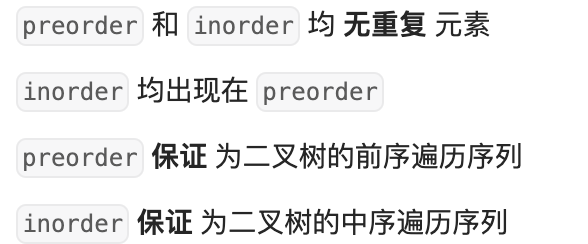

In [ ]:
##递归实现，利用前序遍历和中序遍历一起来确定根节点的位置，分别递归根节点的左右子树，进行建树
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
        #first:构造哈希映射
        index = {j:i for i,j in enumerate(inorder)}
        n = len(preorder)
        def build(preorder_left,preorder_right,inorder_left,inorder_right):
            if preorder_left > preorder_right: return
            preorder_root = preorder_left
            inorder_root = index[preorder[preorder_root]]
            left_size = inorder_root - inorder_left

            root = TreeNode(preorder[preorder_root])
            root.left = build(preorder_left+1,preorder_left+left_size,inorder_left,inorder_root-1)
            root.right = build(preorder_left+left_size+1,preorder_right,inorder_root+1,inorder_right)
            return root
        return build(0,n-1,0,n-1)
    

##递归实现，利用后序遍历和中序遍历一起来确定根节点的位置，分别递归根节点的左右子树，进行建树    
class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> Optional[TreeNode]:
        index = {j:i for i,j in enumerate(inorder)}
        n = len(inorder)

        def build(postorder_left,postorder_right,inorder_left,inorder_right):
            if postorder_left > postorder_right: return
            postorder_root = postorder_right
            inorder_root = index[postorder[postorder_root]]
            right_size = inorder_right - inorder_root

            root = TreeNode(postorder[postorder_root])

            root.left = build(postorder_left,postorder_root-right_size-1,inorder_left,inorder_root-1)

            root.right = build(postorder_right-right_size,postorder_right-1,inorder_root+1,inorder_right)
            return root
        return build(0,n-1,0,n-1)

## 链表

### K个一组反转链表

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseKGroup(self, head: Optional[ListNode], k: int) -> Optional[ListNode]:
        top = ListNode(val=0,next=head)
        tmp = top.next
        counts = 0
        while tmp:
            tmp = tmp.next
            counts += 1
        n = counts//k
        pre,cur = top,top.next
        for i in range(n):
            j = 0
            while j < k-1:
                nexts = cur.next
                cur.next = nexts.next
                nexts.next = pre.next
                pre.next = nexts
                j += 1
            print(pre.val,cur.val)
            pre,cur = cur,cur.next ### 将pre的位置更新，就可以更新正在反转的片段
        return top.next

### 合并k个升序链表

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def merge(self,head1,head2):
        top = ListNode(0)
        result = top
        while head1 and head2:
            if head1.val < head2.val:
                top.next = head1
                head1 = head1.next
            else:
                top.next = head2
                head2 = head2.next
            top = top.next
        if head1:
            top.next = head1
        if head2:
            top.next = head2
        return result.next

    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        if len(lists) ==0:return 
        while len(lists) >1:
            tmp = []
            for i in range(0,len(lists)-1,2):
                tmp.append(self.merge(lists[i],lists[i+1]))
            tmp += lists[i+2:]
            lists = tmp
        return lists[0]

### 递归链表反转

In [ ]:
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
####递归法完成
class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        def recur(cur, pre):
            if not cur: return pre     # 终止条件
            res = recur(cur.next, cur) # 递归后继节点
            cur.next = pre             # 修改节点引用指向
            return res                 # 返回反转链表的头节点
        
        return recur(head, None)       # 调用递归并返回
    
###穿针引线法完成
class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        tmp = ListNode(-1)
        tmp.next = head
        pre = tmp
        cur = pre.next
        while cur and cur.next:
            nexts = cur.next
            cur.next = nexts.next
            nexts.next = pre.next
            pre.next = nexts
        return tmp.next

### 反转中间部分链表
穿针引线法

In [ ]:
class Solution:
    def reverseBetween(self, head: Optional[ListNode], left: int, right: int) -> Optional[ListNode]:
        ###穿针引线法
        first = ListNode(-1)
        first.next = head
        pre = first
        for i in range(left-1):
            pre = pre.next
        
        cur = pre.next
        for _ in range(right - left):
            nexts = cur.next
            cur.next = nexts.next
            nexts.next = pre.next
            pre.next = nexts
        return first.next

In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseBetween(self, head: Optional[ListNode], left: int, right: int) -> Optional[ListNode]:
        top = ListNode(val=0,next=head)
        pre = top
        for i in range(left-1):
            pre = pre.next
        cur = pre.next
        for j in range(right-left):
            nexts = cur.next
            cur.next = nexts.next
            nexts.next = pre.next
            pre.next = nexts
        return top.next

### 原链表的深拷贝

In [ ]:
"""
# Definition for a Node.
class Node:
    def __init__(self, x: int, next: 'Node' = None, random: 'Node' = None):
        self.val = int(x)
        self.next = next
        self.random = random
"""

class Solution:
    def copyRandomList(self, head: 'Optional[Node]') -> 'Optional[Node]':
        ###哈希映射方法太牛了
        if head == None: return head
        dicts = {}
        cur = head
        while cur:###创建所有节点并且存储老节点到新节点的映射关系
            dicts[cur] = Node(cur.val)
            cur = cur.next
        cur = head
        while cur:###给新节点添加链接
            dicts[cur].next = dicts.get(cur.next)
            dicts[cur].random = dicts.get(cur.random)
            cur = cur.next
        return dicts[head]

## 栈

### 最长有效括号

In [ ]:
class Solution:
    def longestValidParentheses(self, s: str) -> int:
        ## 理清楚问题，如果来的是(，直接加入，如果来的是），将栈中有（则pop，然后与栈顶元素相减，如果没有（，则将栈底更新为新的）
        stack = [-1]
        maxs = 0
        for i,j in enumerate(s):
            if j == '(':
                stack.append(i)
            else:
                if len(stack) >=2:
                    stack.pop(-1)
                    maxs = max(maxs,i-stack[-1])
                else:
                    stack[-1] = i
        return maxs

### 有效括号

In [ ]:
#在循环过程中判断出右括号多于左括号的情况，循环结束后判断左括号多于右括号的情况
class Solution:
    def isValid(self, s: str) -> bool:
        if len(s) < 2: return False
        dicts = {'(':1,')':-1,'{':2,'}':-2,'[':3,']':-3}
        stk = [dicts[s[0]]]
        i = 1
        while i < len(s):
            if dicts[s[i]] > 0:
                stk.append(dicts[s[i]])
            else:
                if len(stk) == 0:#说明右括号多
                    return False
                if dicts[s[i]] == -stk[-1]:#左右括号是否匹配
                    stk.pop(-1)
                else:
                    return False
            i += 1
        print(stk)
        if stk:#说明左括号多
            return False
        else:
            return True


### 有效的括号字符串

In [ ]:
class Solution:
    def checkValidString(self, s: str) -> bool:
        if len(s)<2:
            if s == '*': return True
            else: return False
        stk1,stk2 = [],[]
        for i in range(len(s)):
            if s[i]== '(':
                stk1.append(i)
            elif s[i]=='*':
                stk2.append(i)
            else:
                if len(stk1) >0:
                    stk1.pop(-1)
                elif len(stk2) >0:
                    stk2.pop(-1)
                else:
                    return False
        if len(stk1) > len(stk2):
            return False
        else:
            print(len(stk1),len(stk2))
            for i in range(len(stk1)):
                n,m=stk1.pop(-1),stk2.pop(-1)
                if n > m:
                    return False
            return True

## 双指针

### 长度最小的子数组

In [ ]:
##会超出时间限制，第一步寻找的过程时间复杂度为O(n^2)
class Solution:
    def minSubArrayLen(self, target: int, nums: List[int]) -> int:
        result = 1
        begin = None
        for i in range(len(nums)):
            tmp = result
            while i+tmp <= len(nums) and sum(nums[i:i+tmp]) < target:
                #print(i,i+tmp,sum(nums[i:i+tmp]))
                tmp += 1
            #print(sum(nums[i:i+tmp]),i,i+tmp)
            if sum(nums[i:i+tmp]) >= target:
                result = tmp
                begin = i+1
                break
        if begin == None: return 0
        for i in range(begin,len(nums)):
            tmp = result
            while sum(nums[i:i+tmp-1]) >= target:
                tmp -= 1
            if sum(nums[i:i+tmp]) >= target:
                print(i,i+tmp,tmp)
                result = min(result,tmp,len(nums)-i)
        return result

In [ ]:
###滑动窗口方法双while来定义进入和出去，寻找最小窗口，所以一开始窗口设为最大来迭代
class Solution:
    def minSubArrayLen(self, target: int, nums: List[int]) -> int:
        ###滑动窗口方法
        n = len(nums)
        start,end,sums = 0,0,0
        result = n+1
        while end < n:
            sums += nums[end]
            while sums >=target:
                result = min(result,end-start+1)
                sums -= nums[start]
                start += 1
            end += 1
        return 0 if result == n+1 else result

### 盛最多水的容器

In [ ]:
class Solution:
    def maxArea(self, height: List[int]) -> int:
        result = 0
        left,right = 0,len(height)-1
        while left < right:
            result = max(min(height[left],height[right])*(right-left),result)

            if height[left] < height[right]:
                i = left+1
                while height[i] < height[left]:
                    i += 1
                left = i
            else:
                i = right-1
                while height[i] < height[right]:
                    i -= 1
                right = i
        return result

### 三数之和
三指针弱化为二指针，第三个和第二个指针绑定

In [ ]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        nums.sort()
        n = len(nums)
        result = []
        for i in range(n-2):
            if i != 0 and nums[i] == nums[i-1]:
                continue
            third = n-1 ## 每次第二个更换位置时第三个重置，否则重置次数过多
            for j in range(i+1,n-1):
                if j != i+1 and nums[j] == nums[j-1]:
                    continue
                target = -nums[i]-nums[j]
                while third > j and nums[third]>target:
                    third -= 1
                if third > j and nums[third] == target:
                    result.append([nums[i],nums[j],nums[third]])
                elif third <= j:##说明在当前第一个数的限制下已经不能再找到符合条件的结果了，进入下一个i
                    break
        return result

### 下一个排序
1.从后往前找到第一个严格升序列，从而确定了最靠近右边的较小值<br>
2.从后往前找出第一个大于较小值的最大值<br>
3.较大值和较小值交换顺序，将较小值右侧的数列生序排序【本身为降序序列，用双指针进行交换即可】<br>

In [ ]:
class Solution:
    def nextPermutation(self, nums: List[int]) -> None:
        n = len(nums)
        mins = n - 1
        while mins > 0 and nums[mins-1] >= nums[mins]:
            mins -= 1
        mins = mins - 1
        print(mins)
        if mins >= 0:
            maxs = n-1
            while maxs > mins and nums[maxs] <= nums[mins]:
                maxs -= 1
            
            nums[mins],nums[maxs] = nums[maxs],nums[mins]
        
        left,right = mins+1,n-1
        while left < right:
            nums[left],nums[right] = nums[right],nums[left]
            left += 1
            right -= 1
        return nums

### 删除有序数组中的重复项

In [ ]:
class Solution:
    def removeDuplicates(self, nums: List[int]) -> int:
        ## 双指针，一个寻找插入的位置，一个寻找元素，需要往前判断两个单元
        if len(nums) <3: return 2
        slow,n = 2,len(nums)
        for fast in range(2,n):
            if nums[fast] != nums[slow-2]:
                nums[slow] = nums[fast]
                slow += 1
        return slow

## 分治法

### 多数元素

In [ ]:
class Solution:
    def majorityElement(self, nums: List[int]) -> int:
        def fenzhi(nums,a,b):
            if a == b:
                return nums[a]

            mid = (a+b)//2
            left = fenzhi(nums,a,mid)
            right = fenzhi(nums,mid+1,right)

            if left == right:
                return left
            left_count = 0
            right_count = 0
            for i in range(a,b+1):
                if nums[i] == left:
                    left_count += 1
                if nums[i] == right:
                    right_count += 1
            return left if left_count > right_count else right
        return fenzhi(nums,0,len(nums)-1)

## 贪心算法

### 蚂蚁秋招题：
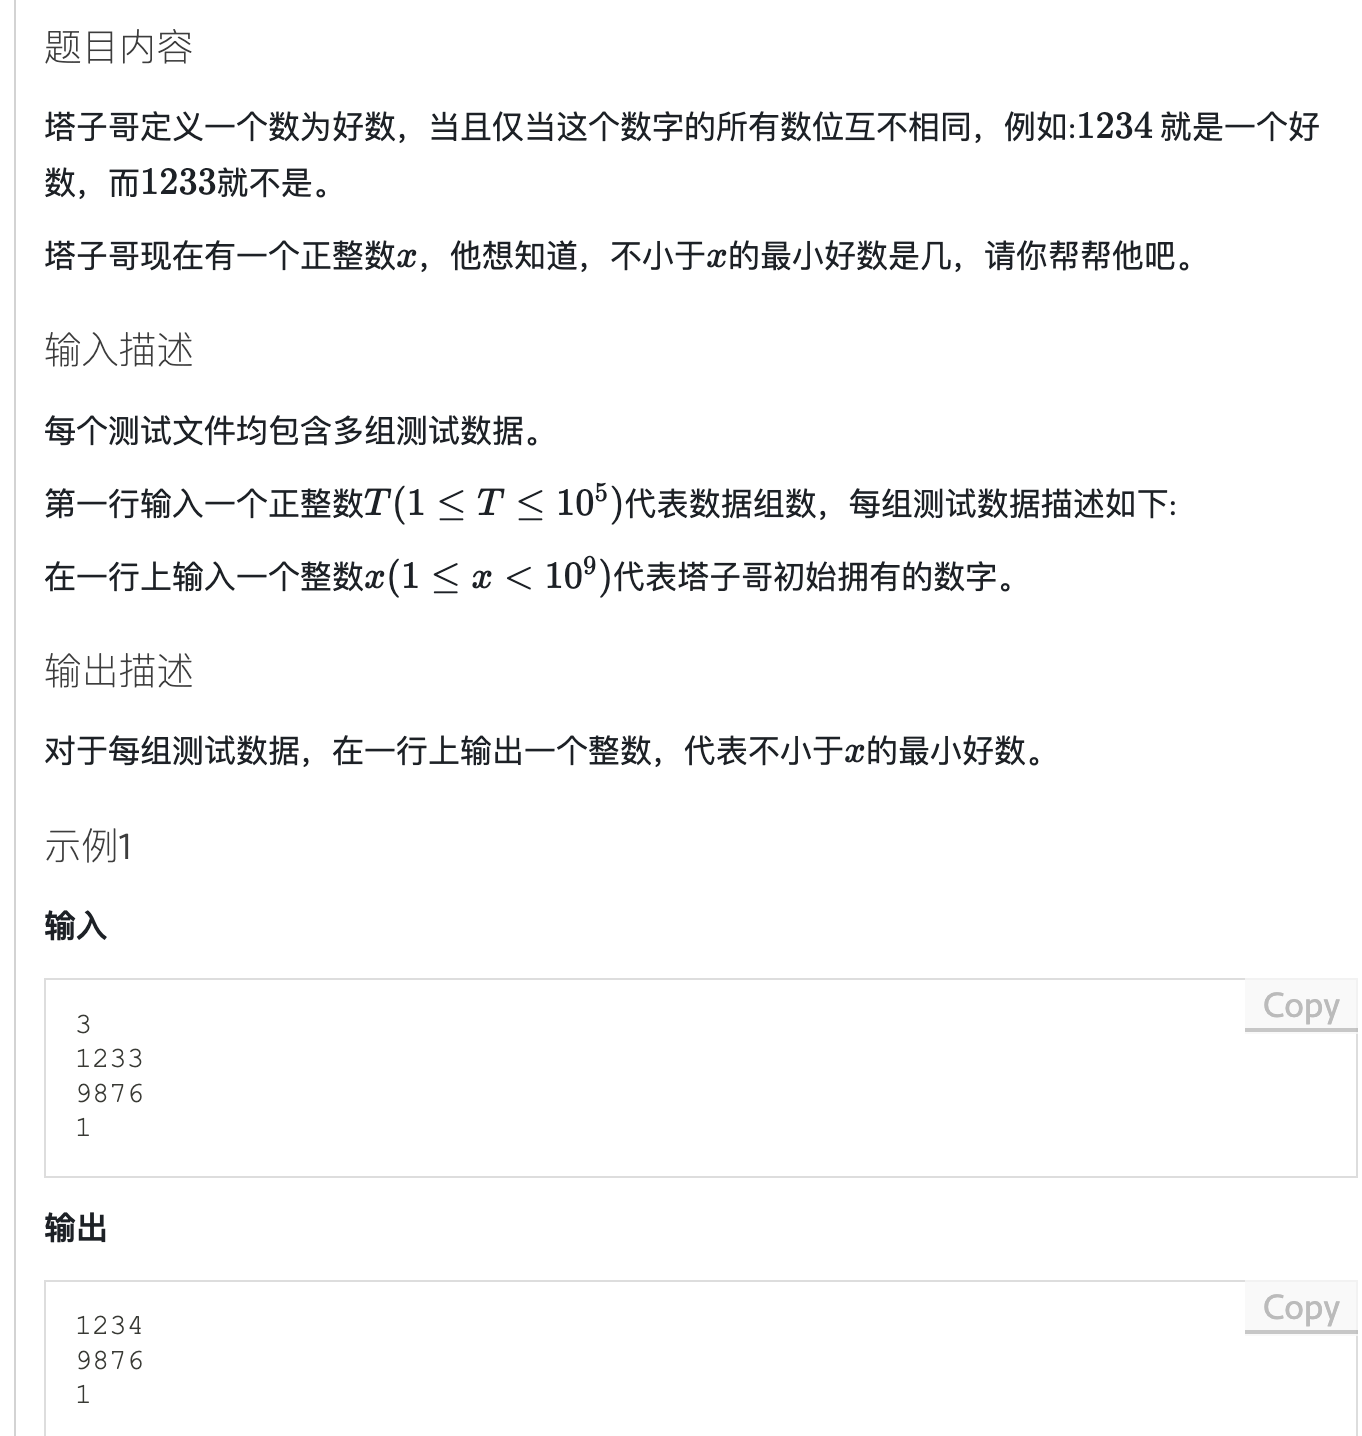

In [ ]:
# 1.搜索最长无重复前缀数组
# 2.对重复的开始位置进行替换，替换为未出现过且大于当前位置的数，如果找到这样的数，替换完成后将后续的数字用小的数字填充，找不到这样的数进入第三步
# 3.从后往前搜索前缀数组，找到第一个不为9且可以找到大于当前数的位置，将其替换，替换完成后将后续的数字用小的数字填充，如果找不到这样的数，进入第四步
# 4.数加一位，直接输出加位后的最小数

def sousuo(nums):
    resulted = set()
    for i,j in enumerate(nums):
        if j not in resulted:
            resulted.add(j)
        else:
            return i
    return -1

def No_chongfu(nums,k):
    for i in range(10):
        if i not in nums[:k] and i>nums[k]:
            return i
    return -1
     
def tianchong(nums,k):
    n = len(nums)
    i,j = k+1,0
    tmp = nums[:k+1]
    while i<n:
        if j not in tmp:
            nums[i] = j
            i += 1
        j += 1

def qiansou(nums,k):
    for i in range(k-1,-1,-1):
        tmp = No_chongfu(nums,i)
        if nums[i] < 9 and tmp>=0:
            nums[i] = tmp
            return i
    return -1

n = int(input())
for _ in range(n):
    nums = list(map(int,input().split()[0]))
    k = sousuo(nums)
    if k == -1:
        print(''.join(list(map(str,nums))))
    else:
        pass
        gai = No_chongfu(nums,k)
        if gai != -1:
            nums[k] = gai
            tianchong(nums,k)
            print(''.join(list(map(str,nums))))
        else:
            key = qiansou(nums,k)
            if key == -1:
                result = [1]*(len(nums)+1)
                tianchong(result,0)
                print(''.join(list(map(str,result))))
            else:
                tianchong(nums,key)
                print(''.join(list(map(str,nums))))

### 分发饼干

In [ ]:
class Solution:
    def findContentChildren(self, g: List[int], s: List[int]) -> int:
        g.sort()
        s.sort()
        n,m = len(g),len(s)
        i,j = 0,0
        while i < n and j < m:
            if g[i] <= s[j]:
                i += 1
            j += 1
        return i

In [ ]:
a = ['1','2','3']
a = a[::-1]

每次给出局部最优，并且可叠加
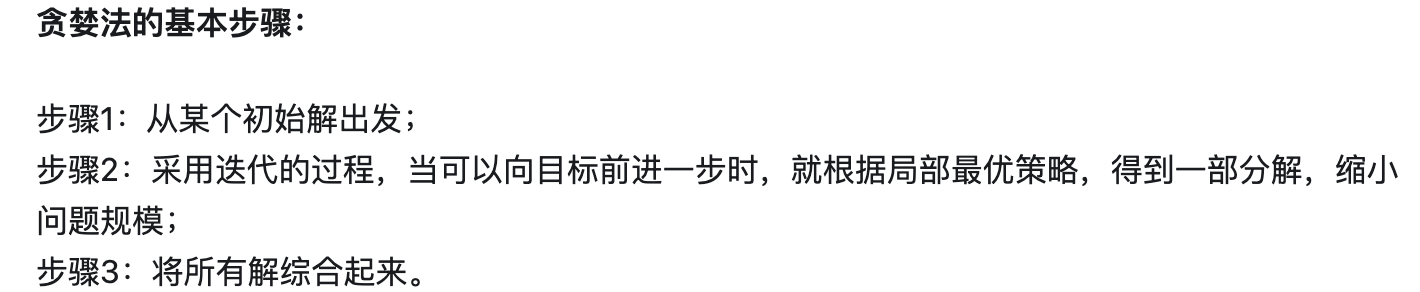

### 买卖股票的最佳时机
问题转化为求不相交的x个区间差值和的最大值，a[i] - a[j]有可以拆分为(a[i] - a[i-1])+(a[i-1] - a[i-2])...，所以目标转化为求相邻数字差值和的最大值

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        result = 0
        for i in range(1,len(prices)):
            result += max(0,prices[i]-prices[i-1])
        return result

In [ ]:
inorder = [5,3,1,2,3,4]
index = {j:i for i,j in enumerate(inorder)}

In [ ]:
index

## 二分查找

### 山脉数组的峰顶索引

In [ ]:
class Solution:
    def peakIndexInMountainArray(self, arr: List[int]) -> int:
        left,right = 0,len(arr)-1
        while left<right:
            mid = (left+right)//2

            if arr[mid] > arr[mid-1] and arr[mid] > arr[mid+1]:
                return mid
            if arr[mid-1] < arr[mid] < arr[mid+1]:
                left = mid + 1
            else:
                right = mid
        return mid

> 变为峰与谷交替的数组

In [ ]:
class Solution:
    def wiggleSort(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        for i in range(1,len(nums)):
            if i%2==0:#峰
                if nums[i] < nums[i-1]:
                    nums[i],nums[i-1] = nums[i-1],nums[i]
            else:#谷
                if nums[i] > nums[i-1]:
                    nums[i],nums[i-1] = nums[i-1],nums[i]

### 寻找旋转排序数组中的最小值

In [ ]:
##自己写的
class Solution:
    def findMin(self, nums: List[int]) -> int:
        n = len(nums)
        left,right=0,n-1
        while left < right:
            mid = (left+right)//2
            if nums[mid] >= nums[0] and nums[mid] >= nums[n-1]:
                left = mid+1
            else:
                right = mid
        return nums[left]



###比较特殊的二分查找：对于小于右侧的值保留边界，对于不小于右侧的值不保留边界
class Solution:
    def findMin(self, nums: List[int]) -> int:    
        low, high = 0, len(nums) - 1
        while low < high:
            pivot = low + (high - low) // 2
            if nums[pivot] < nums[high]:
                high = pivot
            else:
                low = pivot + 1
        return nums[low]


### 寻找排序二叉树的最小值（有重复元素）

In [ ]:
##当mid与左右两侧相等时，无法判断该舍去哪一侧，所以将右侧减一【因为左侧可能是最小值】
class Solution:
    def findMin(self, nums: List[int]) -> int:
        left,right = 0,len(nums)-1
        while left<right:
            mid = (left+right)//2
            if nums[mid] > nums[right]:
                left = mid + 1
            elif nums[mid] < nums[left]:
                right = mid
            else:
                right -=1
        return nums[right]

### 两数之和为目标值---输入有序数组
用二分查找

In [ ]:
class Solution:
    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        n = len(numbers)
        for i in range(n-1):
            res = target - numbers[i]
            left,right = i+1,n-1
            while left < right:
                mid = (left+right)//2
                if numbers[mid] == res:
                    return [i+1,mid+1]
                if numbers[mid] < res:
                    left = mid + 1
                else:
                    right = mid - 1
            if numbers[right] == res:
                return [i+1,right+1]

In [ ]:
# 破解两数之和问题的复杂度，用哈希映射，适用于无关顺序的场景
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        dicts = {}
        for i,j in enumerate(nums):
            if target - j in dicts:
                return [i,dicts[target-j]]
            dicts[j] = i

### 搜索旋转排序数组

In [ ]:
##双指针同时确定搜索方向，时间复杂度为O(n)
class Solution:
    def search(self, nums, target) -> int:
        i,j = 0,len(nums) - 1
        if nums[i] > target and nums[j] < target: return -1

        while i<len(nums) and nums[i] < target:
            i += 1
        if i < len(nums) and nums[i] == target:
            return i
        
        while j >= 0 and nums[j] > target:
            j -= 1
        if j >= 0 and nums[j] == target:
            return j
        return -1
    
    

###二分查找法
class Solution:
    def search(self, nums: List[int], target: int) -> int:
        if not nums: return -1
        n = len(nums)
        left,right = 0,n-1
        while left <= right:
            mid = (left+right)//2
            if nums[mid] == target:
                return mid
            if nums[0] <= nums[mid]:
                if nums[0] <= target < nums[mid]:
                    right = mid - 1
                else:
                    left = mid + 1
            else:
                if nums[mid] < target <= nums[n-1]:
                    left = mid +1
                else:
                    right = mid - 1
        return -1

### 面试题：搜索旋转数组中的目标值，存在目标值则返回最小的下标

In [ ]:
##同二分搜索
## 各种条件都不满足的情况下直接将左边界右移一位，因为存在直接依赖左边界的判断，最坏情况下的结果为线性逐个搜索
class Solution:
    def search(self, arr: List[int], target: int) -> int:
        left,right = 0,len(arr)-1
        while left <= right:
            if arr[left] == target:###依赖左边界来判断
                return left
            mid = (left+right)//2
            if arr[mid] == target:###相等时将右边界直接移过来
                right = mid
            elif arr[left] < arr[mid]:
                if arr[left] <= target < arr[mid]:
                    right = mid - 1
                else:
                    left = mid + 1
            elif arr[right] > arr[mid]:
                if arr[mid] < target <= arr[right]:
                    left = mid +1
                else:
                    right = mid - 1
            else:
                    left += 1
        return -1

### 在排序数组中查找元素的第一个和最后一个位置

In [ ]:
###先找到左边的开始位置，在找到右边的开始位置

class Solution:
    def searchRange(self, nums: List[int], target: int) -> List[int]:
        if not nums: return [-1,-1]
        n = len(nums)
        left,right = 0,n-1
        result = []
        while left<=right:
            mid = (left+right)//2
            if nums[mid] >= target:
                right = mid - 1
            else:
                left = mid + 1
        if left < n and nums[left] == target:
            result.append(left)
        else:
            result.append(-1)
        right = n - 1
        while left <= right:
            mid = (left+right)//2
            if nums[mid] <= target:
                left = mid + 1
            else:
                right = mid - 1
        if right >= 0 and nums[right] == target:
            result.append(right)
        else:
            result.append(-1)
        return result

## BFS
******主要是需要定义清楚入队的顺序以及入队的判断条件，从而达到层便利的效果******

In [ ]:
###层序遍历并记录每一层的结果
####从上到下层序遍历
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        if not root: return []
        queue,son = [root],[]
        result,tmp = [],[]
        while queue:
            vertex = queue.pop(0)
            if vertex.left != None:
                son.append(vertex.left)
            if vertex.right != None:
                son.append(vertex.right)
            tmp.append(vertex.val)

            if len(queue) == 0:
                result.append(tmp)
                tmp = []
                queue = son
                son = []
        return result


####从下到上层序遍历
class Solution:
    def levelOrderBottom(self, root: Optional[TreeNode]) -> List[List[int]]:
        if not root: return []
        queue = [root]
        level_queue = []
        result,tmp = [],[]
        while queue:
            vertex = queue.pop(0)
            if vertex.left != None: level_queue.append(vertex.left)
            if vertex.right != None: level_queue.append(vertex.right)
            tmp.append(vertex.val)

            if len(queue) == 0:
                result.insert(0,tmp)
                tmp = []
                queue = level_queue
                level_queue = []
        return result

    
    
#####Z字形遍历，定义状态变量来切换遍历后值的进入顺序
class Solution:
    def zigzagLevelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        if not root: return []
        queue = [root]
        level_queue = []
        result,tmp = [],[]
        flag = 0
        while queue:
            vertex = queue.pop(0)
            if vertex.left != None: level_queue.append(vertex.left)
            if vertex.right != None: level_queue.append(vertex.right)
            if flag == 0:
                tmp.append(vertex.val)
            else:
                tmp.insert(0,vertex.val)
            if len(queue) == 0:
                queue = level_queue
                level_queue = []
                result.append(tmp)
                tmp = []
                if flag == 0:
                    flag = 1
                else:
                    flag = 0
        return result



### 完全立方数

In [ ]:
a = [1,2,3]
a[:2] = [1]*2

In [ ]:
a = '123'
a = '1'*2 + '3'

In [ ]:
###实际是多叉树的层序遍历，但是要注意记录那些值已经进行了计算，因为同一个值越早出现的所消耗的step越少
###set比list的速度快？？？？
class node(object):
    def __init__(self,val,step=0):
        self.val = val
        self.step = step

class Solution:
    def numSquares(self, n):
        # write code here
        queue = [node(n)]
        visited = set([queue[0].val])

        while queue:
            vertex = queue.pop(0)
            res_lis = [vertex.val - i**3 for i in range(1,int(vertex.val**(1/3))+1)]

            for i in res_lis:
                new_vertex = node(i,step = vertex.step+1)
                if i == 0:
                    return new_vertex.step
                elif i not in visited:
                    queue.append(new_vertex)
                    visited.add(i)
        return -1

In [ ]:
class Solution:
    def numSquares(self, n: int) -> int:
        visited = [n]
        queue = [(n,0)]
        while queue:
            vertex,index = queue.pop(0)
            res = [vertex-i**2 for i in range(1,int(vertex**(0.5))+1)]
            for i in res:
                if i == 0:
                    return index+1
                if i not in visited:
                    visited.append(i)
                    queue.append((i,index+1))

In [ ]:
Solution().numCubes(100)

### 给你两棵二叉树的根节点 p 和 q ，编写一个函数来检验这两棵树是否相同。如果两个树在结构上相同，并且节点具有相同的值，则认为它们是相同的。

In [ ]:
##mycode
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def fun(self,node):
        if node is not None:
            if node.right is not None:
                return [node.left,node.right]
            elif node.left is not None:
                return [node.left]
            else:
                return []
        else:
            return []

    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        queue_p = [p] if p is not None else []
        queue_q = [q] if q is not None else []
        while queue_p and queue_q and len(queue_p) == len(queue_q):
            vertex_p,vertex_q = queue_p.pop(0),queue_q.pop(0)
            if (vertex_p is None and vertex_q is not None) or (vertex_p is not None and vertex_q is None):
                return False
            elif vertex_p is not None:
                if vertex_p.val == vertex_q.val:
                    queue_p += self.fun(vertex_p)
                    queue_q += self.fun(vertex_q)
                else:
                    return False  
        if len(queue_p) != len(queue_q):
            return False
        return True

In [ ]:
##better code
#Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def isSameTree(self, p, q) -> bool:

        if p==None and q==None: return True
        if p==None or q==None: return False


        val_list_p = []
        val_list_q = []

        def bfs(tree_root, val_list):
            #FIFO
            node_queue = [tree_root]
            while len(node_queue)!=0:
                tmp_node = node_queue.pop(0)
                if tmp_node == None: 
                    val_list.append(None)
                    continue
                val_list.append(tmp_node.val)

                node_queue.append(tmp_node.left)
                node_queue.append(tmp_node.right)


            return val_list

        val_list_p = bfs(p, val_list_p)
        val_list_q = bfs(q, val_list_q)


        return val_list_p==val_list_q

## DFS
定义好状态切换过程，什么时候入栈结束，开始切换，如何切换

用递归的时候，想清楚触底反弹的返回值（初始值）和递归的返回值

### 括号生成

In [ ]:
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:
        if n == 0:
            return ['']
        ans = []
        for i in range(n):
            for left in self.generateParenthesis(i):
                for right in self.generateParenthesis(n-i-1):
                    ans.append('({}){}'.format(left,right))
        return ans

### 最长单词

In [ ]:
class Solution:
    def longestWord(self, words: List[str]) -> str:
        words = sorted(words,key=lambda x:(-len(x), x))
        print(words)
        def dfs(word,word_list):
            if len(word) == 0: return True ## 触底反弹时返回给上一个dfs的结果
            for other in word_list:
                if other == word[:len(other)]:
                    if dfs(word[len(other):],word_list):
                        return True ## 最终输出结果
            
            return False ## 最终输出结果

        for i,word in enumerate(words):
            if dfs(word,words[i+1:]):
                return word
        
        return ""


### 岛屿问题专项
牛人讲解：
https://leetcode.cn/problems/number-of-islands/solutions/211211/dao-yu-lei-wen-ti-de-tong-yong-jie-fa-dfs-bian-li-/

#### 岛屿个数

In [ ]:
class Solution:
    def inarea(self,h,w,r,c):
        return 0<=r and r<h and 0<=c and c<w
    
    def area(self,grid,h,w,r,c):
        if self.inarea(h,w,r,c) == False:
            return 1
        if grid[r][c] =='0':
            return 1
        if grid[r][c] =='2':
            return 0

        grid[r][c] = '2'
        return 1+self.area(grid,h,w,r-1,c)+self.area(grid,h,w,r+1,c)+self.area(grid,h,w,r,c-1)+self.area(grid,h,w,r,c+1)
        
        
    def numIslands(self, grid: List[List[str]]) -> int:
        ## 整个遍历结束得到一个岛屿
        h,w = len(grid),len(grid[0])
        result = 0
        for i in range(h):
            for j in range(w):
                if grid[i][j] == '1':
                    self.area(grid,h,w,i,j)
                    result +=1
        return result

#### 岛屿周长

In [ ]:
class Solution:
    def inarea(self,h,w,r,c):
        return 0<=r and r<h and 0<=c and c<w
    
    def area(self,grid,h,w,r,c):
        if self.inarea(h,w,r,c) == False:
            return 1
        if grid[r][c] ==0:
            return 1
        if grid[r][c] !=1:
            return 0

        grid[r][c] = 2
        return self.area(grid,h,w,r-1,c)+self.area(grid,h,w,r+1,c)+self.area(grid,h,w,r,c-1)+self.area(grid,h,w,r,c+1)

    def islandPerimeter(self, grid: List[List[int]]) -> int:
        ## 整个遍历结束得到一个岛屿
        h,w = len(grid),len(grid[0])
        for i in range(h):
            for j in range(w):
                if grid[i][j] == 1:
                    return self.area(grid,h,w,i,j)
        return 0


#### 最大岛屿面积

In [ ]:
class Solution:
    def inarea(self,h,w,r,c):
        return 0<=r and r<h and 0<=c and c<w
    
    def area(self,grid,h,w,r,c):
        if self.inarea(h,w,r,c) == False:
            return 0
        if grid[r][c] !=1:
            return 0

        grid[r][c] = 2
        return 1+self.area(grid,h,w,r-1,c)+self.area(grid,h,w,r+1,c)+self.area(grid,h,w,r,c-1)+self.area(grid,h,w,r,c+1)

    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        ## 整个遍历结束得到一个岛屿
        h,w = len(grid),len(grid[0])
        result = []
        for i in range(h):
            for j in range(w):
                if grid[i][j] == 1:
                    result.append(self.area(grid,h,w,i,j))
        return max(result) if len(result)>0 else 0


### 给定一个二叉树的根节点 root ，返回 它的 中序 遍历 。



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

###中序遍历--迭代法
class Solution:
    def inorderTraversal(self, root) :
        result,stk = [],[]
        while root or stk:
            if root:
                stk.append(root)
                root = root.left
            else:
                root = stk.pop(-1)
                result.append(root.val)
                root = root.right
        return result

    
###前序遍历---迭代法
class Solution:
    def preorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        result = []
        stk = []
        while root or stk:
            if root != None:
                result.append(root.val)
                stk.append(root)
                root = root.left
            else:
                root = stk.pop()
                root = root.right
        return result

###后续遍历---递归法【三种遍历方法都可以使用递归法】
class Solution:
    def postorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        def digui(root):
            if root == None:
                return 
            digui(root.left)
            digui(root.right)
            res.append(root.val)
        
        res = []
        digui(root)    
        return res


In [ ]:
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        value,stk = [],[]
        while root or stk:
            if root:
                stk.append(root)
                root = root.left
            else:
                root = stk.pop(-1)
                value.append(root.val)
                if len(value)>=2 and value[-1] <= value[-2]:
                    return False
                root = root.right
        return True

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

a = TreeNode(val=1)

### 二叉搜索树与双向链表

In [ ]:
###利用二叉搜索树的性质：中序遍历来进行节点的双向连接
class Solution:
    def Convert(self , pRootOfTree ):
        # write code here
        def dfs(cur):
            if cur == None: return 
            dfs(cur.left)
            if self.pre:
                self.pre.right,cur.left = cur,self.pre
            else:
                self.head = cur ###第一次到达二叉树的最左端，开始双向链接，并记录下头节点
            self.pre = cur ##最后一次赋值就是尾节点
            
            dfs(cur.right)

        if pRootOfTree == None: return 
        self.pre = None
        dfs(pRootOfTree)
        self.head.left, self.pre.right = self.pre, self.head ##最后的头尾链接
        return self.head

### 二叉树展开为链表


In [ ]:
class Solution:
    def flatten(self, root: Optional[TreeNode]) -> None:
        while root :
            if root.left:
                sub_left = root.left
                while sub_left.right:
                    sub_left = sub_left.right
                sub_left.right = root.right
                root.right = root.left
                root.left = None
            root = root.right

递归遍历每一条从根节点到叶子结点的路线

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def pathSum(self, root: Optional[TreeNode], targetSum: int) -> List[List[int]]:
        result = []
        path = []

        def dfs(root,targetSum):
            if root == None:
                return
            path.append(root.val)
            targetSum -= root.val

            if root.left == None and root.right == None and targetSum == 0:
                print(path)
                result.append(path[:])
            dfs(root.left,targetSum)
            dfs(root.right,targetSum)
            path.pop()
        
        dfs(root,targetSum)
        return result

In [ ]:
class Solution:
    def pathSum(self, root: Optional[TreeNode], targetSum: int) -> List[List[int]]:
        def digui(root):
            if root == None:
                return
            path.append(root.val)
            if root.left == None and root.right == None and sum(path)==targetSum:
                result.append(path[:])
            digui(root.left)
            digui(root.right)
            print(path)
            path.pop()

        result = []
        path = []
        digui(root)
        return result


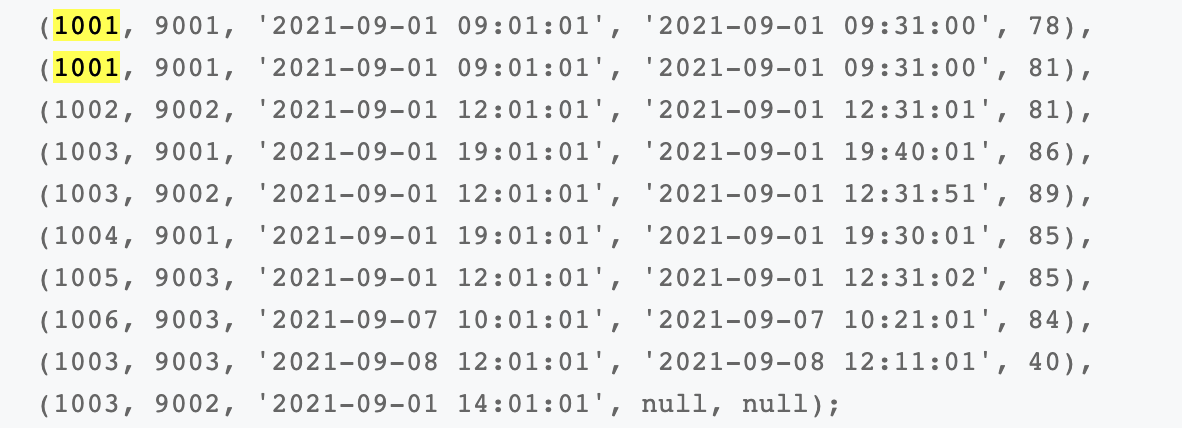

In [10]:
def build(s, t, p):
    # 对 [s,t] 区间建立线段树,当前根的编号为 p
    if s == t:
        d[p] = a[s]
        return
    m = s + ((t - s) >> 1)
    # 移位运算符的优先级小于加减法，所以加上括号
    # 如果写成 (s + t) >> 1 可能会超出 int 范围
    build(s, m, p * 2)
    build(m + 1, t, p * 2 + 1)
    # 递归对左右区间建树
    d[p] = d[p * 2] + d[(p * 2) + 1]

In [8]:
a = [10,11,12,13,14]
d = [0]*len(a)*2

In [17]:
n = len(a)
for i in range(n):
    d[n+i] = a[i]
    
for i in range(n-1,0,-1):
    d[i] = d[i*2]+d[i*2+1]

In [28]:
def _query(l, r,n,tree):
    l += n
    r += n
    result = 0
    while l < r:
        print(l,r,result)
        if l % 2 == 1:
            result += tree[l]
            l += 1
        if r % 2 == 1:
            r -= 1
            result += tree[r]
        l //= 2
        r //= 2
    return result

In [29]:
_query(2,4+1,n,d)

7 10 0
4 5 12


39

In [23]:
d

[33, 60, 37, 23, 27, 10, 11, 12, 13, 14]

In [18]:
    def _query(self, l, r):
        l += self.n
        r += self.n
        result = self.identity_element
        while l < r:
            if l % 2 == 1:
                result += self.tree[l]
                l += 1
            if r % 2 == 1:
                r -= 1
                result += self.tree[r]
            l //= 2
            r //= 2
        return result

    def query(self, start, end):
        if start < 0 or end >= self.n or start > end:
            raise ValueError("Invalid range")
        return self._query(start, end + 1)

[33, 60, 37, 23, 27, 10, 11, 12, 13, 14]

In [ ]:
        for i in range(self.n):
            self.tree[self.n + i] = data[i]
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = self.tree[i * 2] + self.tree[i * 2 + 1]

In [15]:
build(0,len(d)-1,0)

IndexError: list index out of range

In [ ]:
def getsum(l, r, s, t, p):
    # [l, r] 为查询区间, [s, t] 为当前节点包含的区间, p 为当前节点的编号
    if l <= s and t <= r:
        return d[p]  # 当前区间为询问区间的子集时直接返回当前区间的和
    m = s + ((t - s) >> 1)
    sum = 0
    if l <= m:
        sum = sum + getsum(l, r, s, m, p * 2)
    # 如果左儿子代表的区间 [s, m] 与询问区间有交集, 则递归查询左儿子
    if r > m:
        sum = sum + getsum(l, r, m + 1, t, p * 2 + 1)
    # 如果右儿子代表的区间 [m + 1, t] 与询问区间有交集, 则递归查询右儿子
    return sum

## 线段树

In [21]:
class SegmentTree:
    def __init__(self, data, identity_element=0):
        self.n = len(data)
        self.identity_element = identity_element
        self.tree = [identity_element] * (self.n * 2)
        for i in range(self.n):
            self.tree[self.n + i] = data[i]
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = self.tree[i * 2] + self.tree[i * 2 + 1]

    def _update(self, i, value):
        i += self.n
        self.tree[i] = value
        i //= 2
        while i > 0:
            self.tree[i] = self.tree[i * 2] + self.tree[i * 2 + 1]
            i //= 2

    def update(self, index, value):
        if index < 0 or index >= self.n:
            raise IndexError("Index out of bounds")
        self._update(index, self.tree[index + self.n] + value)

    def _query(self, l, r):
        l += self.n
        r += self.n
        result = self.identity_element
        while l < r:
            if l % 2 == 1:
                result += self.tree[l]
                l += 1
            if r % 2 == 1:
                r -= 1
                result += self.tree[r]
            l //= 2
            r //= 2
        return result

    def query(self, start, end):
        if start < 0 or end >= self.n or start > end:
            raise ValueError("Invalid range")
        return self._query(start, end + 1)

# 使用示例
arr = [1, 2, 3, 4, 5]
seg_tree = SegmentTree(arr)

# # 更新索引1的值为3
# seg_tree.update(1, 3)

# 查询索引1到3的区间和
print(seg_tree.query(1, 3))  # 输出应该是 15 (即 2 + 3 + 4 + 5)

9


## 哈希表

### 最长连续序列

In [ ]:
class Solution:
    def longestConsecutive(self, nums: List[int]) -> int:
        ## 最长连续，用k-1来判断是否是一个连续的开始位置，中间位置肯定不如开始位置长
        if len(nums)==0:return 0
        sets = set(nums)
        result = 1
        for i in sets:
            tmp = 1
            k = i
            if k-1 not in sets:
                while k in sets:
                    tmp +=1
                    k += 1
                result = max(tmp-1,result)
        return result

## rand

### 给定生序的int的array，每个元素进行平方操作，并返回升序序列

In [ ]:
arr = [-4,-3,0,1,5,6]

In [ ]:
def fun(arr):
    k = list(map(lambda x:x**2,arr))
    k.sort(reverse=False)
    return k

def fun1(arr):
    #动态规划
    #n = len(arr)
    result = []
    while len(arr) != 0:
        if len(arr) !=1 :
            if abs(arr[0]) > abs(arr[-1]):
                result.append(arr[0]**2)
                arr = arr[1:]
            else:
                result.append(arr[-1]**2)
                arr = arr[:-1]
        else:
            result.append(arr[0]**2)
            arr = []
    result.reverse()
    return result


def fun2(arr):
    a = 0
    b = len(arr) - 1
    result = []
    while a <= b:
        if abs(arr[a]) > abs(arr[b]):
            result.append(arr[a]**2)
            a += 1
        else:
            result.append(arr[b]**2)
            b -= 1
    result.reverse()
    return result

In [ ]:
fun2(arr)

### 给定3个坐标点的集合，如points=[[x1,y1],[x2,y2],[x3,y3]]，如果符合以下条件：1）3个点都是不同的；2）3点不在一直线上，则返回True，否则返回False

In [ ]:
r = [[1,2],[2,4],[3,6]]

def fun(r):
    if (r[0][1] - r[1][1])*(r[2][0] - r[1][0]) != (r[2][1] - r[1][1])*(r[0][0] - r[1][0]):
        return True
    else:
        return False

fun(r)

## 字节校招算法

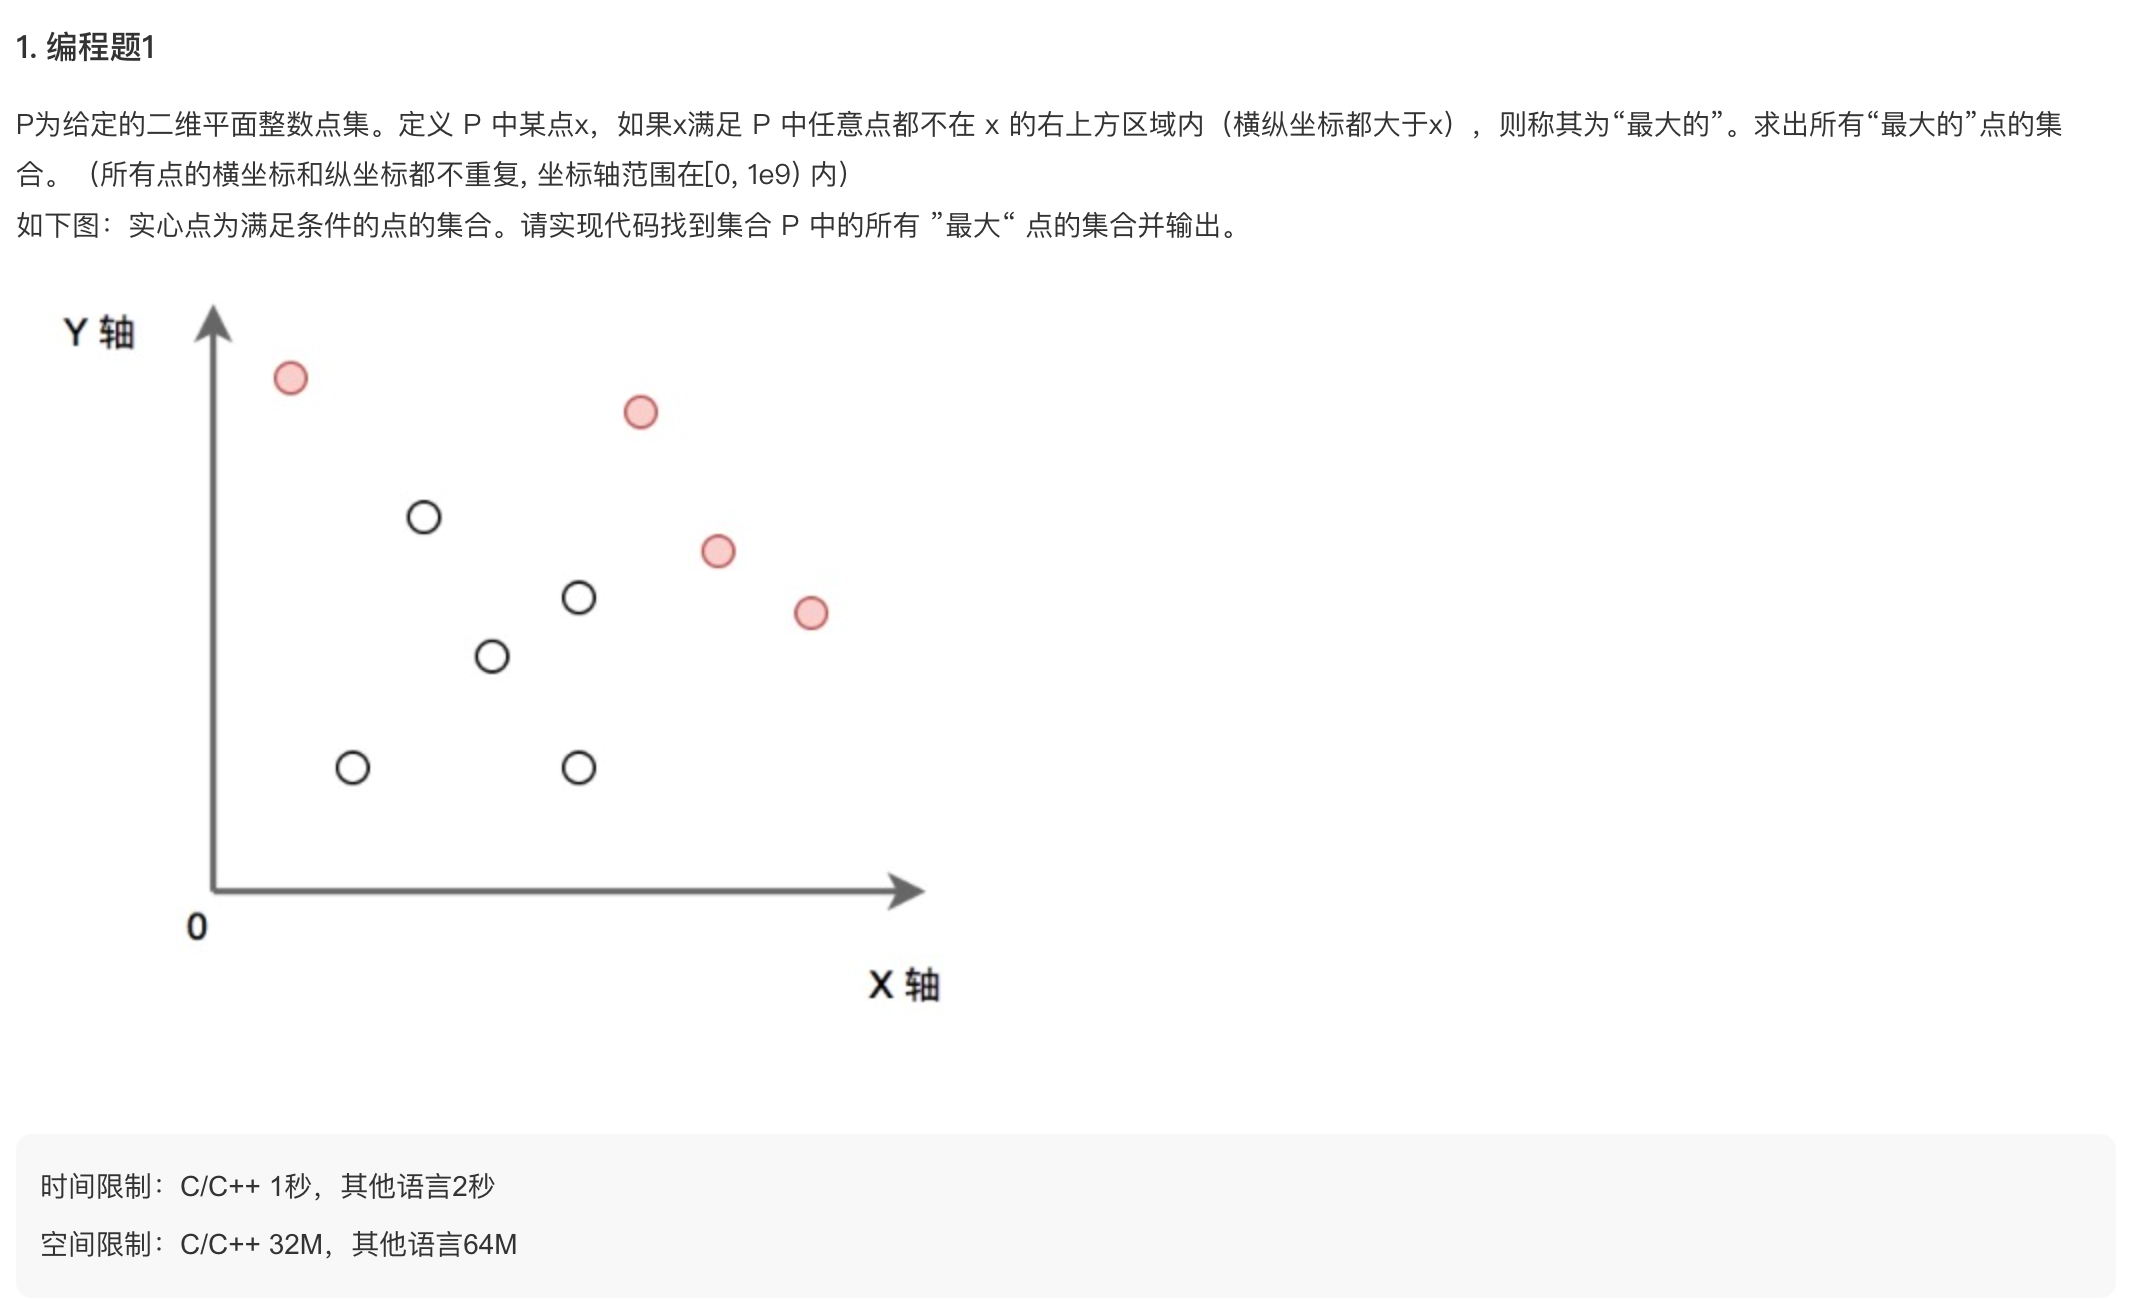

In [ ]:
import sys
pos = []
for line in sys.stdin:
    a = line.split()
    if len(a) == 1:
        N = int(a[0])
    else:
        pos.append((int(a[1]),int(a[0])))
pos.sort(reverse=True)
pre_x = 0
for i in range(len(pos)):
    if pos[i][1] > pre_x:
        print(pos[i][1], pos[i][0])
        pre_x = pos[i][1]


In [ ]:
a = [[0,9],[7,8],[1,2],[3,4]]

In [ ]:
a[2][0]

In [ ]:
a.sort(reverse=True)

In [ ]:
import sys
pos = []
for line in sys.stdin:
    a = line.split()
    if len(a) == 1:
        N = int(a[0])
    else:
        pos.append((int(a[0]),int(a[1])))

pos = sorted(pos,key = lambda x:x[1],reverse=True)

for i in range(len(pos)):
    if i == 0:
        print(pos[i][0],pos[i][1])
        last = pos[i]
    else:
        if pos[i][0] > last[0]:
            print(pos[i][0],pos[i][1])
            last = pos[i]


In [ ]:
import sys 
n = int(sys.stdin.readline().strip())
point = []
for i in range(n):
    point.append(list(map(int, sys.stdin.readline().strip().split())))
point.sort(key=lambda k:k[1],reverse=True)

res = []
res.append(point[0])
for i in  range(1,len(point)):
    if point[i][0] > res[-1][0]:
        res.append(point[i])
    else:
        continue 
res.sort(key=lambda k:k[0])
for i in res:
    print i[0],i[1]


## 位运算

### 只出现一次的数

In [ ]:
###单个二进制的逐个相加用｜太妙了
class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        result = 0
        for i in range(32):
            total = sum((num>>i) & 1 for num in nums)
            if total % 3:
                if i == 31:
                    result -= (1<<i)
                else:
                    result |= (1<<i)
        return result

### 寻找重复数

In [ ]:
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        max_bit = 32
        n = len(nums)
        while (n >> max_bit) == 0:
            max_bit -= 1
        ans = 0
        for i in range(max_bit+1):
            x,y = 0,0
            for j,num in enumerate(nums):
                if num & (1<<i) != 0:
                    x += 1
                if j>=1 and (j & (1<<i)) != 0:
                    y += 1
                
            if x>y:
                ans |= 1<<i
        return ans
            

# sql

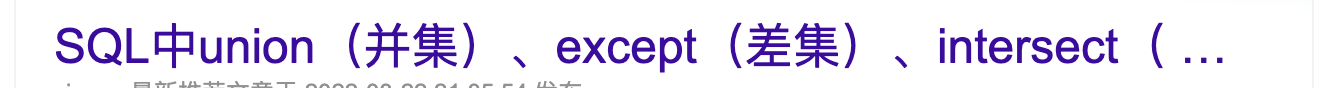

select b.*
from
(
    select customer_id
    from Orders
    where product_name = 'A'
    
    intersect
    
    select customer_id
    from Orders
    where product_name = 'B'
    
    except
    
    select customer_id
    from Orders
    where product_name = 'C'
) a join Customers b on a.customer_id = b.customer_id

In [ ]:
intersect
union
except


###应该被禁止的leetflex账户
select distinct a.account_id
from LogInfo a join LogInfo b on  a.account_id = b.account_id 
where a.ip_address <> b.ip_address ##去重
and a.login <= b.login ##确定左右顺序
and b.login <= a.logout ###筛选结果


<pre>
select b.*
from
(
    select tag,dt,sum(like_cnt) over (partition by tag order by dt rows 6 preceding) as like_cnt_7d,max(retweet_cnt) over (partition by tag order by dt desc rows between current row and 6 following) as max_retweet_cnt_7d
    from
    (
        select t2.tag,date(start_time) as dt,sum(if_like) as like_cnt,sum(if_retweet) as retweet_cnt
        from tb_user_video_log as t1
        left join tb_video_info as t2 on t1.video_id = t2.video_id
        group by 1,2
    ) a
) b
where dt between '2021-10-01' and '2021-10-03'
order by tag desc,dt

=========
**滑动窗口往前和往后**
select *,sum(salary) over (partition by company order by salary rows between 2 preceding and current row) as a,
sum(salary) over (partition by company order by salary rows between current row and 2 following) as b
from Employee

In [ ]:
sum(salary) over (partition by a order by b rows between 5 preceding and current row)
sum(salary) over (partition by a order by b rows between current row and 5 following)

**分组分位数查询**
SELECT order_type,
  percentile_cont(0.5) WITHIN GROUP (
ORDER BY order_qty) AS A,
  percentile_cont(0.75) WITHIN GROUP (
ORDER BY order_qty) AS b
FROM wip_order_test
GROUP BY order_type



**合并到同一个单元格**
SELECT 
  order_type,
  listagg(to_char(order_text),'-') WITHIN GROUP (ORDER BY order_type) AS text
FROM wip_order_test
GROUP BY order_type

===================================================================================================================
**同样的按照顺序合并**
select company,group_concat(salary order by salary ) as k
from Employee
group by company



In [ ]:
datediff

In [ ]:
datediff
unix_timestamp
date_format

<pre>
-- 3.留存用户数计算
CREATE VIEW user_remain_view AS SELECT
a.dates,
count( DISTINCT a.user_id ) AS user_count,
count( DISTINCT ( IF ( DATEDIFF( b.dates, a.dates ) = 1, a.user_id, NULL ) ) ) AS remain1,
-- 1日留存数
count( DISTINCT ( IF ( DATEDIFF( b.dates, a.dates ) = 2, a.user_id, NULL ) ) ) AS remain2,
-- 2日留存数
count( DISTINCT ( IF ( DATEDIFF( b.dates, a.dates ) = 3, a.user_id, NULL ) ) ) AS remain3,
-- 3日留存数
count( DISTINCT ( IF ( DATEDIFF( b.dates, a.dates ) = 4, a.user_id, NULL ) ) ) AS remain4,
-- 4日留存数
count( DISTINCT ( IF ( DATEDIFF( b.dates, a.dates ) = 5, a.user_id, NULL ) ) ) AS remain5,
-- 5日留存数
count( DISTINCT ( IF ( DATEDIFF( b.dates, a.dates ) = 6, a.user_id, NULL ) ) ) AS remain6,
-- 6日留存数
count( DISTINCT ( IF ( DATEDIFF( b.dates, a.dates ) = 7, a.user_id, NULL ) ) ) AS remain7,
-- 7日留存数
count( DISTINCT ( IF ( DATEDIFF( b.dates, a.dates ) = 15, a.user_id, NULL ) ) ) AS remain15,
-- 15日留存数
count( DISTINCT ( IF ( DATEDIFF( b.dates, a.dates ) = 30, a.user_id, NULL ) ) ) AS remain30 
-- 30日留存数

FROM
	( SELECT user_id, dates FROM temp_trade GROUP BY user_id, dates ) a
	LEFT JOIN ( SELECT user_id, dates FROM temp_trade GROUP BY user_id, dates ) b ON a.user_id = b.user_id 
WHERE
	b.dates >= a.dates 
GROUP BY
	a.dates;

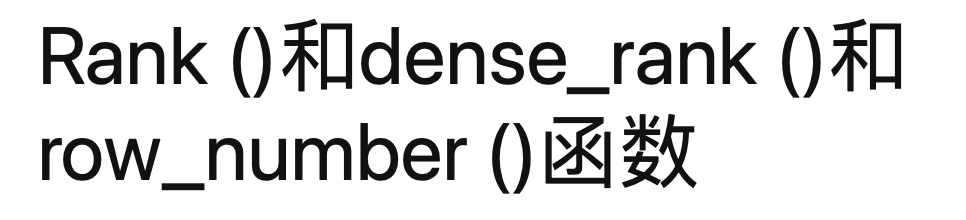

## 递归造序列
https://zhuanlan.zhihu.com/p/58563707

In [ ]:
select
from tmp start with id = 1 connect by prior id = parent_id order by level

**分组聚合的一些语法**
https://zhuanlan.zhihu.com/p/58639733
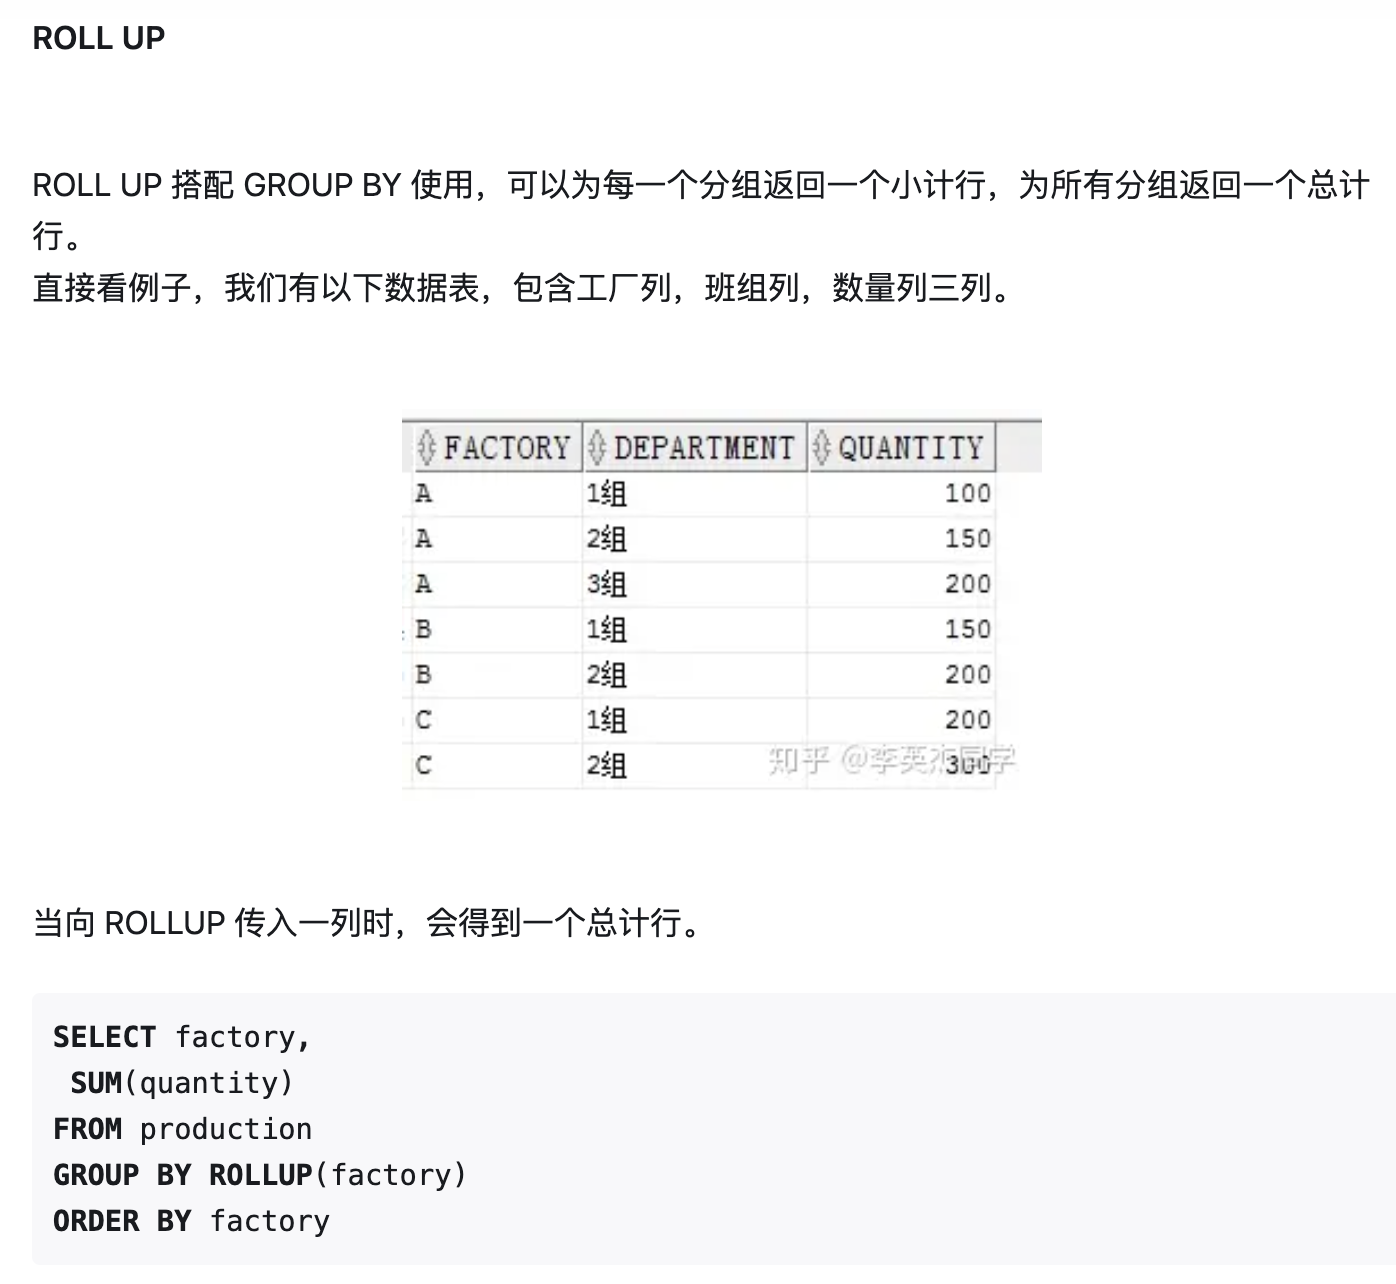

**层次化查询**
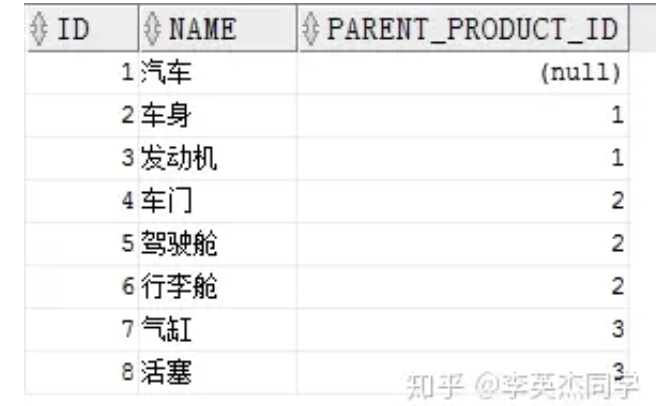
SELECT
  level,
  id,
  parent_product_id,
  name
FROM
  product
  START WITH id  = 1
  CONNECT BY prior id = parent_product_id
ORDER BY
  level

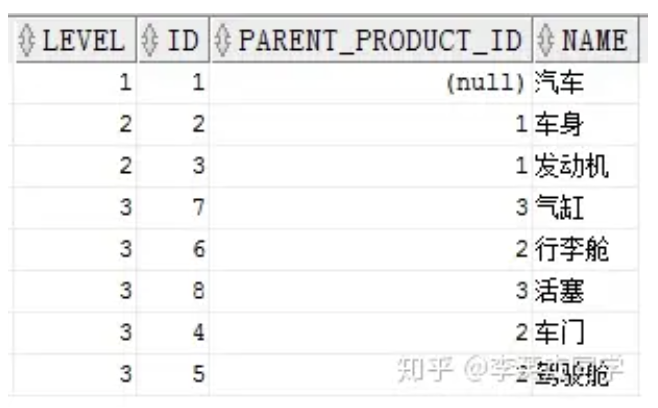



**递归做法**

WITH
  temp_product (product_level, id, parent_product_id,name) AS
  (
    SELECT
      0 AS product_level,id,parent_product_id,name
    FROM
      product
    WHERE
      parent_product_id IS NULL
    UNION ALL
    SELECT
      tp.product_level + 1,p.id,
      p.parent_product_id,
      p.name
    FROM
      product p
    JOIN temp_product tp
    ON
      p.parent_product_id=tp.id
  )
SELECT
  product_level,
  id,
  parent_product_id,
  LPAD(' ', 2 * product_level)
  || name AS NAME
FROM
  temp_product;

**深度优先**
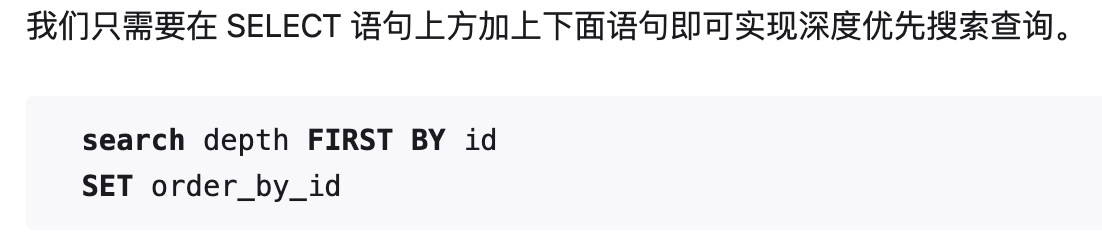


**广度优先**
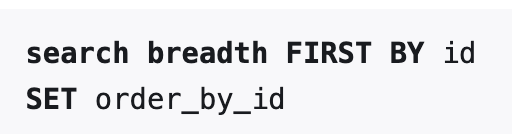

<pre>
with recursive a as 
(
    select id1,id2
    from tmp
    union all
    select a.id1,tmp.id2
    from a join tmp on a.id2 = tmp.id1
)

select *
from a<br>
【这种写法是从逐渐将每一次查询到的子节点并入数据表中的方法】<br>

with recursive a as 
(
    select id1,id2
    from tmp
    where id1 = 1
    union all
    select a.id1,tmp.id2
    from a join tmp on a.id2 = tmp.id1
)

select *
from a<br>
【这种写法设定了每次查询和并入的数据的层级，可以对树结构打标签】<br>


with recursive a as 
(
    select 1 month
    union all
    select month + 1 from a where month <= 11
)

select * from a

**递归无敌**
<pre>
数据表tmp中共有两列数据，id1和id2，其中id1是id2的领导，id2是id1的直属下属，用mysql将这个表中的数据整理为两列数据，分别是id1和id2，其中id2为id1的所有下属，不只是直属下属

WITH RECURSIVE Subordinates AS (
    SELECT id1, id2 FROM Employees
    UNION ALL
    SELECT t.id1, s.id2 FROM Employees t
    JOIN Subordinates s ON t.id2 = s.id1
)
SELECT * FROM Subordinates;


## 排序
1. row_number()
2. rank()
3. dense_rank()

## 日期增减
date_sub('2023-12-11',interval 1 day) <br>
date_add('2023-12-11',interval 1 day)<br>
interval:day,year,month,minute,second,week,hour <br>
- select date_format('2023-10-10 10:00:00','%Y-%m-%d')--日期<br>
- select date_format('2023-10-10 10:00:00','%h-%i-%s')--时间<br>
- select unix_timestamp('2023-10-10 10:00:00')--时间戳<br>
- select datediff('2023-10-12','2023-11-22')---日期差值<br>
- select datediff('2023-10-12 10:10:10','2023-11-22 11:23:40')--只计算日期差值<br>

In [ ]:
unix_timestamp

In [ ]:
datediff
unix_timestamp
date_format
date_sub('2023-11-11',interval 1 day)
date_add

In [ ]:
,round(avg(ride_distance) over (order by month rows between current row and 2 following),2) as average_ride_distance,
round(avg(ride_duration) over (order by month rows between current row and 2 following),2) as average_ride_duration

In [ ]:
avg() over (partition by a order by b rows between current row and 6 following)

<pre>
select *
from 
(
    select user1_id,user2_id
    from Friendship
    union all
    select user2_id,user1_id
    from Friendship
) a
left join Likes b on a.user_id = b.user1_id

## not exists [牛逼]

<pre>
select a.user1_id as user_id,l.page_id,count(distinct a.user2_id) as friends_likes
from
(
    select user1_id,user2_id
    from Friendship
    union all
    select user2_id,user1_id
    from Friendship
) a
left join Likes l on a.user2_id = l.user_id
where not exists
(
    select *
    from Likes b
    where b.user_id = a.user1_id and b.page_id = l.page_id
)
group by a.user1_id,l.page_id

### 员工薪水中位数
<pre>
select a.id,a.company,a.salary
from
(
    select t.*,
    row_number() over (partition by company order by salary) as indexs
    from Employee t
) a
join
(
    select company,count(id) as nums
    from Employee
    group by 1
) b on a.company = b.company
where (nums %2 = 0 and indexs = nums/2)
or (nums %2 = 0 and indexs = (nums/2)+1)
or (nums %2 = 1 and indexs = (nums+1)/2)
order by a.company,a.salary



select a.id,a.company,a.salary
from
(
    select t.*,
    row_number() over (partition by company order by salary) as indexs,
    count(id) over (partition by company) as nums
    from Employee t
) a
where indexs between nums/2 and nums/2 +1


### 给定数字频数，查询中位数
select avg(t.num) as median
from
(
    select *,sum(frequency) over () alls,
    sum(frequency) over (order by num) as a,
    sum(frequency) over (order by num desc) as b
    from Numbers
) t
where t.a >= t.alls/2 and t.b >= t.alls/2



### 复杂业务逻辑计算员工累计薪水
with tmp as
(
    select a.*
    from
    (
        select *, max(month) over (partition by id) as maxs
        from Employee
    ) a
    where month <> maxs
) 

select id,month, salary + case when month - lag1 <=2 then lag2 else 0 end + case when month - lag3 <=2 then lag4 else 0 end as salary
from
(
    select *,lag(month,1,0) over (partition by id order by month) as lag1,
    lag(salary,1,0) over (partition by id order by month) as lag2,
    lag(month,2,0) over (partition by id order by month) as lag3,
    lag(salary,2,0) over (partition by id order by month) as lag4
    from tmp
) t
group by id,month
order by id,month desc


### 透视表转换，首先构造一个字段，确定每个值在哪一行，在通过这个构造的字段进行聚合
SELECT 
    min(CASE continent WHEN 'America'THEN NAME ELSE NULL END) AS America,
    min(CASE continent WHEN 'Asia'THEN NAME ELSE NULL END) AS Asia,
    min(CASE continent WHEN 'Europe'THEN NAME ELSE NULL END) AS Europe 
FROM 
    (SELECT *, ROW_NUMBER() OVER (PARTITION BY continent ORDER BY NAME) rk FROM student) t
GROUP BY rk


select event_date as install_dt,count(player_id) as installs,
round(count(case when datediff(next_date,event_date) = 1 then 1 end)/count(player_id),2) as Day1_retention
from
(
select *,lead(event_date,1,null) over (partition by player_id order by event_date) as next_date,
min(event_date) over (partition by player_id) as first_date
from Activity 
) a
where a.event_date = a.first_date
group by 1
order by event_date


### 打标，分类统计，用group by，如果count不是2就返回自身的platform
with tmp1 as 
(
    select *,
    case when class1 = 'mobile' and class2 = 'mobile' then 'mobile'
        when class1 = 'desktop' and class2 = 'desktop' then 'desktop'
        when class1 <> class2 then 'both' end as class
    from
    (
        select *,min(platform) over (partition by user_id,spend_date) as class1,
        max(platform) over (partition by user_id,spend_date) as class2
        from Spending
    ) a
),
tmp2 as
(
    select spend_date,class
    from
    (
        select distinct spend_date
        from Spending
    ) a
    join 
    (
        select 'desktop' as class union
        select 'mobile' as class union 
        select 'both' as class
    ) b
)

select tmp2.spend_date,tmp2.class as platform,sum(coalesce(amount,0)) as total_amount,
count(distinct user_id) as total_users
from tmp2 left join tmp1 on tmp1.spend_date = tmp2.spend_date and tmp1.class = tmp2.class
group by 1,2


select a.user_id as seller_id,case when seller_id is not null then 'yes' else 'no' end as 2nd_item_fav_brand
from Users a
left join
(
    select seller_id
    from 
    (
        select *,count(order_id) over (partition by seller_id order by order_date) as indexs
        from Orders a
    ) t1
    join Users t2 on t1.seller_id = t2.user_id
    join Items t3 on t1.item_id = t3.item_id
    where t1.indexs = 2 and t3.item_brand = t2.favorite_brand
) b on a.user_id and b.seller_id


### 锦标赛获胜者
with tmp as
(
select first_player as player,first_score as score
from Matches
union all
select second_player as player,second_score as score
from Matches
)

select group_id,player_id
from
(
select group_id,first_value(player) over (partition by group_id order by score desc,player) as player_id
from
(
    select t1.player,t2.group_id,sum(t1.score) as score
    from tmp t1 join Players t2 on t1.player = t2.player_id
    group by 1,2
) a
) t
group by 1,2

### 1917 lettcodyting好友推荐
<pre>
with k as 
(
    select t1.day,t1.song_id,t1.user_id as user1,t2.user_id as user2
    from Listens t1
    join Listens t2 on t1.song_id = t2.song_id and t1.day = t2.day
    where t1.user_id <> t2.user_id
    and (t1.user_id,t2.user_id) not in (
        select user1_id,user2_id
        from Friendship
        union all
        select user2_id,user1_id
        from Friendship
    )
)


select user1 user_id,user2 recommended_id
from k
group by user1,user2,day
having count(distinct song_id) >=3

===================================================================================================================

with AllFriendship(user1_id, user2_id) as (
    select user1_id, user2_id
    from Friendship
    union All 
    select user2_id, user1_id
    from Friendship
)

select distinct l1.user_id,
l2.user_id as recommended_id 
from Listens l1
inner join Listens l2
  on l1.song_id = l2.song_id
  and l1.user_id <> l2.user_id
  and not exists (select 1 from AllFriendship where user1_id = l1.user_id and l2.user_id = user2_id)
  and l1.day = l2.day
group by l1.user_id, l2.user_id, l1.day
having count(distinct l2.song_id) >= 3

=================================================================================================================

### 兴趣相同的朋友

select distinct user1 as user1_id, user2 as user2_id
from
(
    select t1.user_id as user1,t2.user_id as user2,t1.song_id,t1.day
    from Listens t1 join Listens t2 
    on t1.song_id = t2.song_id and t1.day = t2.day
    where t1.user_id < t2.user_id
    and exists (select * from Friendship where user1_id = t1.user_id and user2_id = t2.user_id)
    group by 1,2,3,4
) a
group by user1,user2,day
having count(distinct song_id) >=3

### 同一天的第一个电话和最后一个电话----正序翻序再连接
<pre>
with a as (
    SELECT caller_id, recipient_id, call_time
    FROM Calls
    UNION ALL
    SELECT recipient_id caller_id, caller_id recipient_id, call_time
    FROM Calls
)

SELECT a.caller_id,b.recipient_id,a.rk,b.rk
FROM
(SELECT caller_id, recipient_id, dense_rank() over (PARTITION BY caller_id, DATE_FORMAT(call_time, '%Y-%m-%d') order by call_time) AS rk
FROM a) a
INNER JOIN 
(SELECT caller_id, recipient_id, dense_rank() over (PARTITION BY caller_id, DATE_FORMAT(call_time, '%Y-%m-%d') order by call_time DESC) AS rk
FROM a) b
ON a.caller_id = b.caller_id AND a.recipient_id = b.recipient_id 

### 职员招聘人数

with tmp as
(
    select employee_id,experience,
    sum(salary) over (partition by experience order by salary,employee_id) as salarys
    from Candidates
),
b as
(
    select *,70000 - salarys as res
    from tmp
    where experience = 'Senior'
    and 70000 - salarys  >= 0
),
c as
(
    select *
    from tmp
    where experience = 'Junior'
    and coalesce((select min(res) from b),70000) - salarys >= 0
)

select 'Senior' as experience, count(*) as accepted_candidates
from b
union all
select 'Junior' as experience, count(*) as accepted_candidates
from c

### 连续递增交易----将不是连续递增的点打标为1，开窗累加，就可以获得连续递增区间的分割标签
<pre>
select customer_id,min(transaction_date) as consecutive_start,
max(transaction_date) as consecutive_end
from
(
    select *,sum(flag) over (partition by customer_id order by transaction_date) as indexs
    from
    (
        select customer_id,transaction_date,amount,
        if(lag(amount,1,null) over (partition by customer_id order by transaction_date) - amount < 0,0,1) as flag,
        date_sub(transaction_date,interval row_number() over (partition by customer_id order by transaction_date) day) as begain
        from Transactions
    ) k
) a
group by customer_id,indexs,begain
having count(1) > 2



### 购买量严格增加的客户
<pre>
with recursive a as
(
    select (select min(year(order_date)) from Orders) as years
    union all
    select years + 1 from a where years < (select max(year(order_date)) from Orders)
)

select customer_id
from
(
    select customer_id, if(lag(prices,1,0) over (partition by customer_id order by years) < prices,0,1) as flags
    from
    (
        select customer_id,years,sum(prices) as prices
        from
        (
            select *,case when year(order_date) = years then price else 0 end as prices
            from
            (
            select customer_id,order_date,price,
            min(year(order_date)) over (partition by customer_id) as mins,
            max(year(order_date)) over (partition by customer_id) as maxs 
            from Orders t
            ) k,a
            where a.years between k.mins and k.maxs
        ) k
        group by 1,years
        order by customer_id,years
    ) p
) l
group by 1
having max(flags) = 0

# 无敌

### 最多连胜次数----用@变量灵活打标签
<pre>
with tmp as
(
    select *,
    lag(result,1,null) over (partition by player_id order by match_day) as last
    from Matches
)

select player_id,max(flag) as longest_streak
from
(
select tmp.*,
case when result = 'Win' and result=last then @n:=@n+1
     when result = 'Win' and last != result then @n:= 1
     when result = 'Win' and last is null then @n:=1
     when result != 'win' then @n:=0 end as flag
from tmp,(select @n:=0) as a
) k
group by 1

<pre>
select *,
dense_rank(salary) over (partition by company order by salary) as flag1,
dense_rank(salary) over (partition by company order by salary desc) as flag2,
count(salary) over (partition by company) as num
from Employee

## 表格行列转换--先定义表格中转换后的顺序，在groupby取出来

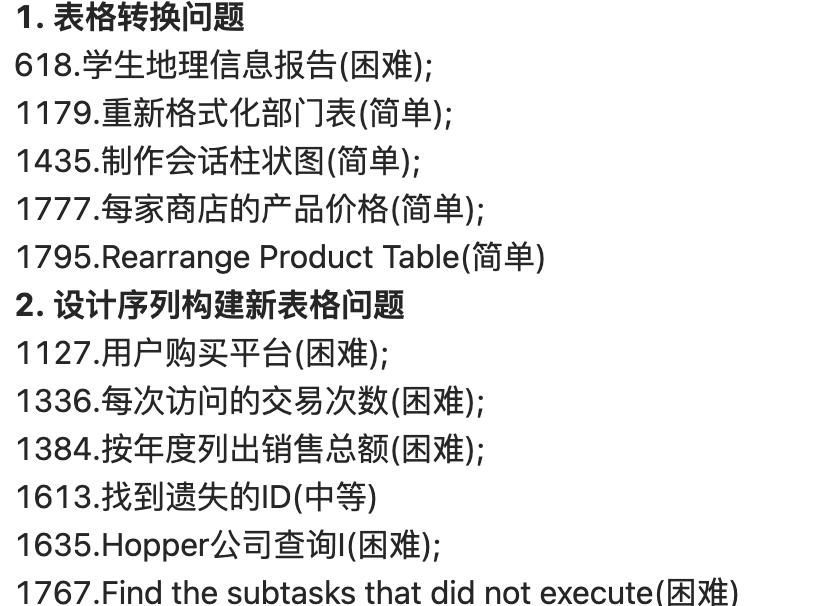

<pre>
select min(case when continent = 'America' then name end) as America,
min(case when continent = 'Asia' then name end) as Asia,
min(case when continent = 'Europe' then name end) as Europe
from 
(
    select *,row_number() over (partition by continent order by name) as rk
    from Student
) t
group by rk


select request_at,round(count(case when status <> 'completed' then id end)/count(id),2) as Cancellation Rate
from Trips t1 join Users t2 on t1.client_id = t2.users_id
join Users t3 on t1.driver_id = t3.users_id
where t2.banned <> 'Yes'
and t3.banned <> 'Yes'
and request_at between '2013-10-01' and '2013-10-03'
group by 1